In [34]:
import wrds
import datetime
import decimal
from sklearn.decomposition import PCA
import pandas as pd
import datetime
import numpy as np
import math
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.dates as mdates
from scipy.stats import norm 
#See Styles
#print(plt.style.available)
%matplotlib inline
import pickle
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
!pip3 install --upgrade pandas

'pip3' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
conn = wrds.Connection(wrds_username='justinbooms')
#conn.create_pgpass_file()

Enter your WRDS username [justi]:justinbooms
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [4]:
ticker_dict = {'tickers':('QQQ','IWM','JNK', 'GLD', 'TLT', 'SPY', 'IBM', 'XLU', 'GE','MSFT','MMM','JNJ','PG', 'ED','HYG','AAPL')}
permno_dict = {'permno':(86755,88222,92922, 90448, 89468, 84398, 12490,86458,12060, 10107,22592,22111,18163, 11404,91933,14593)}

#ticker_dict = {'tickers':('QQQ','IWM','JNK', 'GLD')}
#permno_dict = {'permno':(86755,88222,92922, 90448)}

#ticker and corresponding weight
#ticker_lst = ['QQQ','IWM','JNK', 'GLD']
#target_weight = [0.25,0.25,0.4,0.1]

#ticker_dict = {'tickers':('QQQ','JNK' )}
#permno_dict = {'permno':(86755,92922)}
#ticker and corresponding weight
ticker_lst = ['QQQ','JNK']
target_weight = [0.6,0.4]


In [12]:
ticker_dict = {'tickers':('XAR','XBI','XES', 'XHB', 'XHE', 'XHS', 'XITK', 'XLB', 'XLE','XLF','XLI','XLK','XLP', 'XLRE','XLU','XLV','XLY', 'XME', 'XOP', 'XPH', 'XRT', 'XSD', 'XSW', 'XTH', 'XTL', 'XTN', 'XWEB')}
permno_dict = {'permno':(86755,88222,92922, 90448, 89468, 84398, 12490,86458,12060, 10107,22592,22111,18163, 11404,91933,14593)}

#ticker_dict = {'tickers':('QQQ','IWM','JNK', 'GLD')}
#permno_dict = {'permno':(86755,88222,92922, 90448)}

#ticker and corresponding weight
#ticker_lst = ['QQQ','IWM','JNK', 'GLD']
#target_weight = [0.25,0.25,0.4,0.1]

#ticker_dict = {'tickers':('QQQ','JNK' )}
#permno_dict = {'permno':(86755,92922)}
#ticker and corresponding weight
ticker_lst = ['QQQ','JNK']
target_weight = [0.6,0.4]


In [6]:
ticker_dict = {'tickers':('XAR','XBI','XES', 'XHB', 'XHE', 'XHS')}
permno_dict = {'permno':(86755,88222,92922, 90448, 89468, 84398, 12490,86458,12060, 10107,22592,22111,18163, 11404,91933,14593)}

#ticker_dict = {'tickers':('QQQ','IWM','JNK', 'GLD')}
#permno_dict = {'permno':(86755,88222,92922, 90448)}

#ticker and corresponding weight
#ticker_lst = ['QQQ','IWM','JNK', 'GLD']
#target_weight = [0.25,0.25,0.4,0.1]

#ticker_dict = {'tickers':('QQQ','JNK' )}
#permno_dict = {'permno':(86755,92922)}
#ticker and corresponding weight
ticker_lst = ['QQQ','JNK']
target_weight = [0.6,0.4]


In [13]:
# Get Permnos via ticker 

permnos = conn.raw_sql('select distinct permno, ticker, namedt, nameenddt, comnam\
                        from crsp.stocknames a\
                        where 1=1\
                        and a.ticker in %(tickers)s', params = ticker_dict)
#
permnos.sort_values(by=['namedt', 'nameenddt'], ascending=[False,False])



,permno,ticker,namedt,nameenddt,comnam
46,"91,318.0000",XOP,2020-03-30,2020-12-31,SPDR SERIES TRUST
50,"91,319.0000",XES,2020-03-30,2020-12-31,SPDR SERIES TRUST
9,"16,139.0000",XWEB,2016-06-28,2020-12-31,SPDR SERIES TRUST
8,"16,138.0000",XTH,2016-06-28,2020-05-29,SPDR SERIES TRUST
7,"15,919.0000",XITK,2016-01-14,2020-12-31,SPDR SERIES TRUST
6,"15,732.0000",XLRE,2015-10-08,2020-12-31,SELECT SECTOR SPDR TRUST
3,"12,997.0000",XHS,2011-09-29,2020-12-31,SPDR SERIES TRUST
4,"12,998.0000",XSW,2011-09-29,2020-12-31,SPDR SERIES TRUST
5,"12,999.0000",XAR,2011-09-29,2020-12-31,SPDR SERIES TRUST
0,"12,533.0000",XTL,2011-01-27,2020-12-31,SPDR SERIES TRUST


In [14]:
permno_dict = {'permno':(86458,86457,86455, 86456, 86453, 86454, 86452,86451,86449, 91124,91123,91122,91320, 91319,91318,91317,91316)}

In [15]:
permnos['namedt'] = pd.to_datetime(permnos['namedt'])
permnos['nameenddt'] = pd.to_datetime(permnos['nameenddt'])

In [16]:
#reformat date
permnos_grp=permnos.groupby(['permno','ticker']).agg({'namedt': ['min',]}).sort_values(by=['ticker'],ascending=True)
print(permnos_grp)
print  ('\n')
print  ('#----------------------shape--------------------#')
print  ("shape of raw: ",permnos.shape)
print  ("shape of grouped: ",permnos_grp.shape)
print  ('\n')

                       namedt
                          min
permno      ticker           
12,999.0000 XAR    2011-09-29
91,124.0000 XBI    2006-02-06
91,319.0000 XES    2006-06-22
91,123.0000 XHB    2006-02-06
12,534.0000 XHE    2011-01-27
12,997.0000 XHS    2011-09-29
15,919.0000 XITK   2016-01-14
86,449.0000 XLB    1998-12-22
86,454.0000 XLE    1998-12-22
86,455.0000 XLF    1998-12-22
86,456.0000 XLI    1998-12-22
86,457.0000 XLK    1998-12-22
86,452.0000 XLP    1998-12-22
15,732.0000 XLRE   2015-10-08
86,458.0000 XLU    1998-12-22
86,451.0000 XLV    1998-12-22
86,453.0000 XLY    1998-12-22
91,320.0000 XME    2006-06-22
91,318.0000 XOP    2006-06-22
91,317.0000 XPH    2006-06-22
91,316.0000 XRT    2006-06-22
91,122.0000 XSD    2006-02-06
12,998.0000 XSW    2011-09-29
16,138.0000 XTH    2016-06-28
12,533.0000 XTL    2011-01-27
12,717.0000 XTN    2011-01-27
16,139.0000 XWEB   2016-06-28


#----------------------shape--------------------#
shape of raw:  (54, 5)
shape of grouped:  (27, 1

In [11]:
# df = a.groupby('user').agg({'num1':'min', 'num2':'max'})[['num1','num2']].reset_index()
permnos_grp2 = permnos.groupby(['permno','ticker']).agg({'namedt':'min', 'nameenddt':'max'}) # [['num1','num2']].reset_index()
print(permnos_grp2)

                       namedt  nameenddt
permno      ticker                      
12,534.0000 XHE    2011-01-27 2020-12-31
12,997.0000 XHS    2011-09-29 2020-12-31
12,999.0000 XAR    2011-09-29 2020-12-31
91,123.0000 XHB    2006-02-06 2020-12-31
91,124.0000 XBI    2006-02-06 2020-12-31
91,319.0000 XES    2006-06-22 2020-12-31


In [73]:
# Get Permnos via permn
permno_shrt = conn.raw_sql('select distinct permno, ticker\
                    from crsp.stocknames a\
                    where 1=1\
                    and a.permno in %(permno)s', params = permno_dict)
print( permno_shrt.sort_values(by=['ticker']) )



        permno ticker
8  91,124.0000    XBI
7  91,319.0000    XES
0  91,123.0000    XHB
14 86,449.0000    XLB
6  86,454.0000    XLE
9  86,455.0000    XLF
2  86,456.0000    XLI
10 86,457.0000    XLK
16 86,452.0000    XLP
5  86,458.0000    XLU
1  86,451.0000    XLV
3  86,453.0000    XLY
15 91,320.0000    XME
11 91,318.0000    XOP
4  91,317.0000    XPH
13 91,316.0000    XRT
12 91,122.0000    XSD


In [19]:
# Get Historical Data 
asset_hist = conn.raw_sql('select b.ticker, b.permno\
                    ,a.date,a.prc, a.ret from crspm.dsf a\
                    join (select distinct permno, ticker from crsp.stocknames) b\
                    on a.permno = b.permno\
                    where 1=1\
                    and a.permno in %(permno)s', params = permno_dict)
#reformat date
asset_hist['date'] = pd.to_datetime(asset_hist['date'])
asset_hist_grp=asset_hist.groupby(['permno','ticker']).agg({'date': ['min', 'max', 'count']}).sort_values(by=['ticker'],ascending=True)
print(asset_hist_grp)
print  ('\n')
print  ('#----------------------shape--------------------#')
print  ("shape of raw: ",asset_hist.shape)
print  ("shape of grouped: ",asset_hist_grp.shape)
print  ('\n')

                         date                 
                          min        max count
permno      ticker                            
91,124.0000 XBI    2006-02-06 2021-03-31  3814
91,319.0000 XES    2006-06-22 2021-03-31  3719
91,123.0000 XHB    2006-02-06 2021-03-31  3814
86,449.0000 XLB    1998-12-22 2021-03-31  5604
86,454.0000 XLE    1998-12-22 2021-03-31  5604
86,455.0000 XLF    1998-12-22 2021-03-31  5604
86,456.0000 XLI    1998-12-22 2021-03-31  5604
86,457.0000 XLK    1998-12-22 2021-03-31  5604
86,452.0000 XLP    1998-12-22 2021-03-31  5604
86,458.0000 XLU    1998-12-22 2021-03-31  5604
86,451.0000 XLV    1998-12-22 2021-03-31  5604
86,453.0000 XLY    1998-12-22 2021-03-31  5604
91,320.0000 XME    2006-06-22 2021-03-31  3719
91,318.0000 XOP    2006-06-22 2021-03-31  3719
91,317.0000 XPH    2006-06-22 2021-03-31  3719
91,316.0000 XRT    2006-06-22 2021-03-31  3719
91,122.0000 XSD    2006-02-06 2021-03-31  3814


#----------------------shape--------------------#
shape of

In [18]:
# Drop rows where duplicate ticker: example QQQ and QQQQ 
# note, with ticker in the the stocknames table and not in dsf, there will be duplicates based on ticker 
# in those cases, ticker will need to be dropped. 

asset_hist=asset_hist[asset_hist.ticker != 'QQQQ'] 
print  ("shape of raw: ",asset_hist.shape)

shape of raw:  (80473, 5)


In [11]:
asset_hist_ED = asset_hist[asset_hist['ticker']=='ED']
print  (asset_hist_ED.head())
print  ('\n')
print  ('#----------------------shape--------------------#')
print  ("shape of raw: ",asset_hist_ED.shape)
print  ('\n')

     ticker      permno       date     prc     ret
8835     ED 11,404.0000 1925-12-31 94.5000     NaN
8836     ED 11,404.0000 1926-01-02 95.0000  0.0053
8837     ED 11,404.0000 1926-01-04 94.6250 -0.0039
8838     ED 11,404.0000 1926-01-05 94.5000 -0.0013
8839     ED 11,404.0000 1926-01-06 96.7500  0.0238


#----------------------shape--------------------#
shape of raw:  (25107, 5)




In [12]:
asset_hist_ED.tail()

,ticker,permno,date,prc,ret
33937,ED,"11,404.0000",2021-03-25,74.2700,0.0114
33938,ED,"11,404.0000",2021-03-26,74.4400,0.0023
33939,ED,"11,404.0000",2021-03-29,75.4500,0.0136
33940,ED,"11,404.0000",2021-03-30,74.3800,-0.0142
33941,ED,"11,404.0000",2021-03-31,74.8000,0.0056


In [13]:
asset_hist_MSFT = asset_hist[asset_hist['ticker']=='MSFT']
print(asset_hist_MSFT.head())
print  ('\n')
print  ('#----------------------shape--------------------#')
print  ("shape of raw: ",asset_hist_MSFT.shape)
print  ('\n')

  ticker      permno       date     prc     ret
0   MSFT 10,107.0000 1986-03-13 28.0000     NaN
1   MSFT 10,107.0000 1986-03-14 29.0000  0.0357
2   MSFT 10,107.0000 1986-03-17 29.5000  0.0172
3   MSFT 10,107.0000 1986-03-18 28.7500 -0.0254
4   MSFT 10,107.0000 1986-03-19 28.2500 -0.0174


#----------------------shape--------------------#
shape of raw:  (8835, 5)




In [14]:
asset_hist_GE = asset_hist[asset_hist['ticker']=='GE']
print(asset_hist_GE.head())
print  ('\n')
print  ('#----------------------shape--------------------#')
print  ("shape of: ",asset_hist_GE.shape)
print  ('\n')

      ticker      permno       date      prc     ret
84156     GE 12,060.0000 1925-12-31 326.0000     NaN
84157     GE 12,060.0000 1926-01-02 326.5000  0.0015
84158     GE 12,060.0000 1926-01-04 325.0000 -0.0046
84159     GE 12,060.0000 1926-01-05 325.5000  0.0015
84160     GE 12,060.0000 1926-01-06 326.2500  0.0023


#----------------------shape--------------------#
shape of:  (25107, 5)




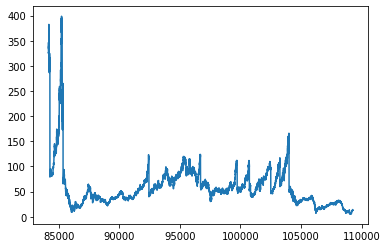

In [15]:
#plt.plot(df_apple["Adj Close"]);
plt.plot(asset_hist[asset_hist['ticker']=='GE'].prc);

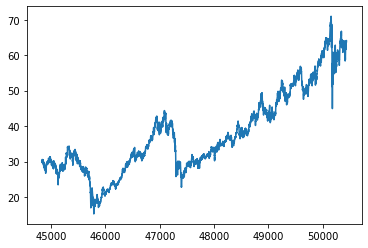

In [75]:
plt.plot(asset_hist[asset_hist['ticker']=='XLU'].prc);

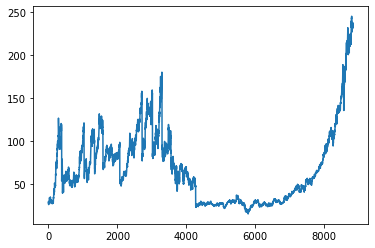

In [17]:
plt.plot(asset_hist[asset_hist['ticker']=='MSFT'].prc);

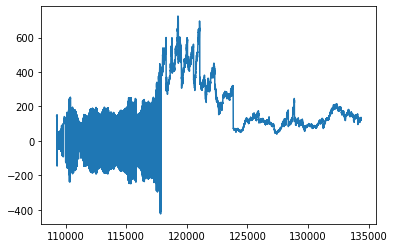

In [18]:
plt.plot(asset_hist[asset_hist['ticker']=='IBM'].prc);

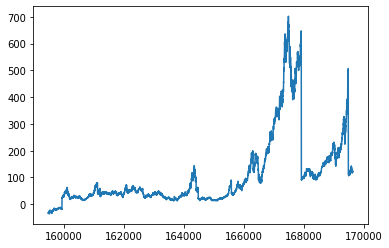

In [19]:
plt.plot(asset_hist[asset_hist['ticker']=='AAPL'].prc);

In [76]:
asset_hist

,ticker,permno,date,prc,ret
0,XLB,"86,449.0000",1998-12-22,20.8281,NaN
1,XLB,"86,449.0000",1998-12-23,21.0469,0.0105
2,XLB,"86,449.0000",1998-12-24,21.5312,0.0230
3,XLB,"86,449.0000",1998-12-28,21.3438,-0.0087
4,XLB,"86,449.0000",1998-12-29,21.7344,0.0183
...,...,...,...,...,...
80468,XME,"91,320.0000",2021-03-25,37.4800,0.0218
80469,XME,"91,320.0000",2021-03-26,39.8600,0.0635
80470,XME,"91,320.0000",2021-03-29,38.9000,-0.0241
80471,XME,"91,320.0000",2021-03-30,39.3100,0.0105


In [20]:
list(set(list(asset_hist['ticker'])))

['XLE',
 'XLI',
 'XLK',
 'XLV',
 'XHB',
 'XPH',
 'XLY',
 'XLU',
 'XLF',
 'XLB',
 'XME',
 'XOP',
 'XSD',
 'XRT',
 'XBI',
 'XLP',
 'XES']

In [22]:
def ret_rebalance(data,portfolio_weights, initial_money = 1000000, rebalance_days = 20, threshold = 10):
    
    arr_data = np.array(data)

    arr_port_det = np.zeros([data.shape[0], data.shape[1]*3]) #Need to change back to data
    arr_port_sum = np.zeros([data.shape[0], 1])
    arr_port_ret = np.zeros([data.shape[0], 1]) #Need to change back to data
    arr_portfolio_weights = np.array([i for i in portfolio_weights.values()])

    #This loop goes through the data set "d", which should be a daily time series of asset returns and prices.
    #Returns should be broken into returns including dividends, returns without dividends, and dividend only returns. 

    arr_data = np.array(data)
    cum_ret_2 = np.cumprod(arr_data, axis=0)

    #Since the cum_ret_2 keeps track of the cumulative returns and when we rebalance, the cumulative return
    #needs to be reset to 1, so create an array to keep track the cumulative returns right before rebalancing,
    #and this will be used to reset the cumulative returns.

    cum_ret_tracking = np.zeros(data.shape[1])
    cum_ret_tracking[:]=1

    trading_day_counter=1
    count = 0
    initial_arr_asset_val = initial_money*arr_portfolio_weights
    num_assets = cum_ret_2.shape[1]
    
    for row in cum_ret_2:
        tradeflag = 0
        arr_latest_ret = row
        cur_asset_val = initial_arr_asset_val * arr_latest_ret/cum_ret_tracking
        
        total_value = sum(cur_asset_val)
        
        
        arr_actual_weights = cur_asset_val/total_value
        dev_weights = np.absolute((arr_actual_weights/arr_portfolio_weights)-1)
        
        if trading_day_counter % rebalance_days == 0 or np.amax(dev_weights) > threshold:
            
            
            
            tradeflag = 1
            cum_ret_tracking = arr_latest_ret

            arr_new_port_det = np.array([], dtype='f8')
          
            cur_asset_val = total_value*arr_portfolio_weights
      
            initial_arr_asset_val = cur_asset_val
            trading_day_counter=1
            
            #end_time1 = timeit.default_timer()-start_time1
            #print('1 '+str(end_time1))
        else:
            trading_day_counter += 1    
        #Reaggregates all the data into the dataframe "portfolio_detail" and "portfolio_sum"

        
      
        test = [[row[[i]], arr_actual_weights[i], cur_asset_val[i]] for i in range(num_assets)]
        test2 = [item for regularlist in test for item in regularlist]
        arr_port_det[count] = test2

        

        if count == 0:
            arr_port_ret[count] = 0
        else:
            arr_port_ret[count] = [(total_value/arr_port_sum[count-1])-1]
        arr_port_sum[count] = [total_value]
        tradeflag = 0
        count += 1
        
        
    return arr_port_sum, arr_port_det, arr_port_ret

In [312]:
def pca_port_weights(data, scree_threshold = .7, min_pp = 4, rebalance_threshold = .4):
    #Determine Weights
    
    n_asset = data.shape[1]
    pca = PCA(n_components=n_asset)

    kendcorr = data.corr('kendall')
    pcafit = pca.fit(kendcorr)
    
    cum_exp_var = pcafit.explained_variance_ratio_.cumsum()
    scree_comps = np.searchsorted(cum_exp_var, scree_threshold, side="left")

    if scree_comps >= min_pp:
        n_comps = scree_comps
    else:
        n_comps = min_pp
    
    
    
    comps = pcafit.components_


    tot_pp_weights = np.zeros(n_comps)
    tot_pp_weights[0] = rebalance_threshold*2 - cum_exp_var[0]
    tot_pp_weights[1:] = (1-tot_pp_weights[0])/(n_comps-1)

    long = np.zeros([n_comps, n_asset])
    short = np.zeros([n_comps, n_asset])

    for i in range(n_comps):
        l = np.zeros(n_asset)
        s = np.zeros(n_asset)
        pp = comps[i]

        #if pp.sum() < 0:
         #   pp = -pp
            
        pos = pp.sum(where = pp>0)
        neg = abs(pp.sum(where = pp<0))
        w = tot_pp_weights[i]


        for t in range(n_asset):
            c = pp[t]

            if c > 0:
                l[t] = c/pos

            if c < 0:
                s[t] = c/neg

        long[i] = pos/(pos+neg)*l
        short[i] = neg/(pos+neg)*s

    total = long+short
    portfolio = np.matmul(tot_pp_weights, long+short)
    norm_portfolio = portfolio/sum(abs(portfolio))
    
    return norm_portfolio

In [302]:
pca_port_weights(data[:125], scree_threshold = .7, min_pp = 5, rebalance_threshold = .4)

array([ 0.02516942,  0.03585981,  0.0235144 , -0.11484801,  0.03969854,
       -0.1019627 , -0.08833007, -0.02132184, -0.09841921,  0.0214973 ,
        0.0338895 , -0.0847495 , -0.07548992,  0.04290391,  0.03809643,
       -0.08498046,  0.06926899])

In [323]:
def pca_ret_rebalance(data, initial_money = 1000000, rebalance_days = 5, scree_threshold = .7, min_pp = 4, corr_window = 125, rebalance_threshold = .4, threshold = 10):
    
    arr_data = np.array(data)
    n_comp = arr_data.shape[1]
    arr_port_det = np.zeros([data.shape[0], data.shape[1]*3]) #Need to change back to data
    arr_port_sum = np.zeros([data.shape[0], 1])
    arr_port_ret = np.zeros([data.shape[0], 1]) #Need to change back to data
    
    #Determine Weights
    pca_port_data = data.iloc[0:corr_window]
    arr_portfolio_weights = pca_port_weights(pca_port_data, scree_threshold = scree_threshold, min_pp = min_pp, rebalance_threshold = rebalance_threshold)
    
    
    
    #This loop goes through the data set "d", which should be a daily time series of asset returns and prices.
    #Returns should be broken into returns including dividends, returns without dividends, and dividend only returns. 

    arr_data = np.array(data)
    cum_ret_2 = np.cumprod(arr_data, axis=0)

    #Since the cum_ret_2 keeps track of the cumulative returns and when we rebalance, the cumulative return
    #needs to be reset to 1, so create an array to keep track the cumulative returns right before rebalancing,
    #and this will be used to reset the cumulative returns.

    cum_ret_tracking = np.zeros(data.shape[1])
    cum_ret_tracking[:]=1

    trading_day_counter=1
    count = 0
    initial_arr_asset_val = initial_money*abs(arr_portfolio_weights)
    num_assets = cum_ret_2.shape[1]
    for row in cum_ret_2:
        
        tradeflag = 0
        
        arr_latest_ret = row
        
        cur_asset_val = initial_arr_asset_val * arr_latest_ret/cum_ret_tracking
        print(cum_ret_tracking)
        total_value = sum(cur_asset_val)
        
        arr_actual_weights = cur_asset_val/total_value
        
        dev_weights = np.absolute((arr_actual_weights/arr_portfolio_weights)-1)
        
        if trading_day_counter % rebalance_days == 0 or np.amax(dev_weights) > threshold:
            
            
            
            tradeflag = 1
            cum_ret_tracking = arr_latest_ret

            arr_new_port_det = np.array([], dtype='f8')
            pca_port_data = data.iloc[count:count+corr_window]
            arr_portfolio_weights = pca_port_weights(pca_port_data, scree_threshold = scree_threshold, min_pp = min_pp, rebalance_threshold = rebalance_threshold)
            #print(arr_portfolio_weights)
            cur_asset_val = total_value*abs(arr_portfolio_weights)
      
            initial_arr_asset_val = cur_asset_val
            trading_day_counter=1
            
            #end_time1 = timeit.default_timer()-start_time1
            #print('1 '+str(end_time1))
        else:
            trading_day_counter += 1    
        #Reaggregates all the data into the dataframe "portfolio_detail" and "portfolio_sum"

        
      
        test = [[row[[i]], arr_actual_weights[i], cur_asset_val[i]] for i in range(num_assets)]
        test2 = [item for regularlist in test for item in regularlist]
        arr_port_det[count] = test2

        

        if count == 0:
            arr_port_ret[count] = 0
        else:
            arr_port_ret[count] = [(total_value/arr_port_sum[count-1])-1]
        arr_port_sum[count] = [total_value]
        tradeflag = 0
        count += 1
        
        
    return arr_port_sum, arr_port_det, arr_port_ret

1.0

In [324]:
xx,yy,zz = pca_ret_rebalance(data, initial_money = 1000000, rebalance_days = 5, scree_threshold = .7, min_pp = 17, corr_window = 125, rebalance_threshold = .4)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.02828718 1.07072136 1.01723419 1.04139506 1.08310992 1.01885015
 1.02021111 1.01742162 1.01800671 1.01771583 1.00400664 1.01397749
 1.09363216 1.11629937 1.0118552  1.01050645 1.0010778 ]
[1.02828718 1.07072136 1.01723419 1.04139506 1.08310992 1.01885015
 1.02021111 1.01742162 1.01800671 1.01771583 1.00400664 1.01397749
 1.09363216 1.11629937 1.0118552  1.01050645 1.0010778 ]
[1.02828718 1.07072136 1.01723419 1.04139506 1.08310992 1.01885015
 1.02021111 1.01742162 1.01800671 1.01771583 1.00400664 1.01397749
 1.09363216 1.11629937 1.0118552  1.01050645 1.0010778 ]
[1.02828718 1.07072136 1.01723419 1.04139506 1.08310992 1.01885015
 1.02021111 1.01742162 1.01800671 1.01771583 1.00400664 1.01397749
 1.09363216 1.11629937 1.011

 0.93813343 1.03849819 1.08881972 1.04296451 1.07471682]
[1.05566487 0.95386679 1.0034843  1.0343934  1.02031667 1.07771202
 0.9939097  1.08180738 1.07235714 1.0721775  1.1099568  1.04362516
 0.93813343 1.03849819 1.08881972 1.04296451 1.07471682]
[1.05566487 0.95386679 1.0034843  1.0343934  1.02031667 1.07771202
 0.9939097  1.08180738 1.07235714 1.0721775  1.1099568  1.04362516
 0.93813343 1.03849819 1.08881972 1.04296451 1.07471682]
[1.05566487 0.95386679 1.0034843  1.0343934  1.02031667 1.07771202
 0.9939097  1.08180738 1.07235714 1.0721775  1.1099568  1.04362516
 0.93813343 1.03849819 1.08881972 1.04296451 1.07471682]
[1.05566487 0.95386679 1.0034843  1.0343934  1.02031667 1.07771202
 0.9939097  1.08180738 1.07235714 1.0721775  1.1099568  1.04362516
 0.93813343 1.03849819 1.08881972 1.04296451 1.07471682]
[1.03687169 0.91071822 1.00139993 1.02554127 0.98765123 1.09224578
 0.99300084 1.0967701  1.06562335 1.08493397 1.10627144 1.062805
 0.88321076 0.99121458 1.08817733 1.07072296 1.

 1.17605779 1.19630357 1.11353486 1.12058049 1.10664337]
[1.18420079 1.09533758 1.13212086 1.15996325 1.16961726 1.14185023
 1.0738829  1.17856648 1.09592549 1.18315838 1.112302   1.16753281
 1.17605779 1.19630357 1.11353486 1.12058049 1.10664337]
[1.18420079 1.09533758 1.13212086 1.15996325 1.16961726 1.14185023
 1.0738829  1.17856648 1.09592549 1.18315838 1.112302   1.16753281
 1.17605779 1.19630357 1.11353486 1.12058049 1.10664337]
[1.18420079 1.09533758 1.13212086 1.15996325 1.16961726 1.14185023
 1.0738829  1.17856648 1.09592549 1.18315838 1.112302   1.16753281
 1.17605779 1.19630357 1.11353486 1.12058049 1.10664337]
[1.18420079 1.09533758 1.13212086 1.15996325 1.16961726 1.14185023
 1.0738829  1.17856648 1.09592549 1.18315838 1.112302   1.16753281
 1.17605779 1.19630357 1.11353486 1.12058049 1.10664337]
[1.12898138 1.09852068 1.1014506  1.14816032 1.1578961  1.15132876
 1.06661256 1.16958891 1.09676715 1.18347735 1.11632233 1.16144407
 1.13403191 1.17077621 1.10744843 1.10575792 

[1.07608215 1.03549421 1.0296123  1.21629148 1.08795277 1.13565403
 1.07336091 1.15572006 1.0997762  1.22707572 1.12427041 1.15858009
 1.17454418 1.09914222 1.10540252 1.10130249 1.07630238]
[1.07608215 1.03549421 1.0296123  1.21629148 1.08795277 1.13565403
 1.07336091 1.15572006 1.0997762  1.22707572 1.12427041 1.15858009
 1.17454418 1.09914222 1.10540252 1.10130249 1.07630238]
[1.07608215 1.03549421 1.0296123  1.21629148 1.08795277 1.13565403
 1.07336091 1.15572006 1.0997762  1.22707572 1.12427041 1.15858009
 1.17454418 1.09914222 1.10540252 1.10130249 1.07630238]
[1.07608215 1.03549421 1.0296123  1.21629148 1.08795277 1.13565403
 1.07336091 1.15572006 1.0997762  1.22707572 1.12427041 1.15858009
 1.17454418 1.09914222 1.10540252 1.10130249 1.07630238]
[1.07608215 1.03549421 1.0296123  1.21629148 1.08795277 1.13565403
 1.07336091 1.15572006 1.0997762  1.22707572 1.12427041 1.15858009
 1.17454418 1.09914222 1.10540252 1.10130249 1.07630238]
[1.06610553 1.04752251 0.98308285 1.210326   

 1.47336397 1.27062826 1.21548018 1.17255045 1.15476963]
[1.24559636 1.21577993 1.03776404 1.33134258 1.25302093 1.21143419
 1.16777181 1.2565445  1.16051074 1.37286782 1.2405203  1.21120694
 1.47336397 1.27062826 1.21548018 1.17255045 1.15476963]
[1.24559636 1.21577993 1.03776404 1.33134258 1.25302093 1.21143419
 1.16777181 1.2565445  1.16051074 1.37286782 1.2405203  1.21120694
 1.47336397 1.27062826 1.21548018 1.17255045 1.15476963]
[1.24559636 1.21577993 1.03776404 1.33134258 1.25302093 1.21143419
 1.16777181 1.2565445  1.16051074 1.37286782 1.2405203  1.21120694
 1.47336397 1.27062826 1.21548018 1.17255045 1.15476963]
[1.24559636 1.21577993 1.03776404 1.33134258 1.25302093 1.21143419
 1.16777181 1.2565445  1.16051074 1.37286782 1.2405203  1.21120694
 1.47336397 1.27062826 1.21548018 1.17255045 1.15476963]
[1.23686803 1.23031257 1.02101623 1.33233818 1.27042388 1.21207365
 1.17236216 1.26657683 1.17156324 1.38160397 1.23444605 1.20294243
 1.43318125 1.28341003 1.2031567  1.14014471 

[1.18653162 1.2546761  0.76403272 1.28061697 1.28220597 1.03061552
 1.20114324 1.27246654 1.13985115 1.23628093 1.14267219 1.11521951
 1.2727657  1.24559232 1.07960828 1.05063938 1.10944616]
[1.18653162 1.2546761  0.76403272 1.28061697 1.28220597 1.03061552
 1.20114324 1.27246654 1.13985115 1.23628093 1.14267219 1.11521951
 1.2727657  1.24559232 1.07960828 1.05063938 1.10944616]
[1.18653162 1.2546761  0.76403272 1.28061697 1.28220597 1.03061552
 1.20114324 1.27246654 1.13985115 1.23628093 1.14267219 1.11521951
 1.2727657  1.24559232 1.07960828 1.05063938 1.10944616]
[1.18653162 1.2546761  0.76403272 1.28061697 1.28220597 1.03061552
 1.20114324 1.27246654 1.13985115 1.23628093 1.14267219 1.11521951
 1.2727657  1.24559232 1.07960828 1.05063938 1.10944616]
[1.18653162 1.2546761  0.76403272 1.28061697 1.28220597 1.03061552
 1.20114324 1.27246654 1.13985115 1.23628093 1.14267219 1.11521951
 1.2727657  1.24559232 1.07960828 1.05063938 1.10944616]
[1.22886629 1.28658371 0.81077353 1.28928338 

[1.40355461 1.41780672 0.67600357 1.46528207 1.50331256 1.09457066
 1.25065575 1.40925578 1.21930531 1.37491662 1.21982554 1.12602714
 1.55083916 1.52475593 1.10418921 1.04273975 1.11854066]
[1.40355461 1.41780672 0.67600357 1.46528207 1.50331256 1.09457066
 1.25065575 1.40925578 1.21930531 1.37491662 1.21982554 1.12602714
 1.55083916 1.52475593 1.10418921 1.04273975 1.11854066]
[1.40355461 1.41780672 0.67600357 1.46528207 1.50331256 1.09457066
 1.25065575 1.40925578 1.21930531 1.37491662 1.21982554 1.12602714
 1.55083916 1.52475593 1.10418921 1.04273975 1.11854066]
[1.40355461 1.41780672 0.67600357 1.46528207 1.50331256 1.09457066
 1.25065575 1.40925578 1.21930531 1.37491662 1.21982554 1.12602714
 1.55083916 1.52475593 1.10418921 1.04273975 1.11854066]
[1.40355461 1.41780672 0.67600357 1.46528207 1.50331256 1.09457066
 1.25065575 1.40925578 1.21930531 1.37491662 1.21982554 1.12602714
 1.55083916 1.52475593 1.10418921 1.04273975 1.11854066]
[1.40308938 1.39440707 0.62432687 1.41371603 

 1.41671281 1.34208679 1.03554307 0.84170237 0.85144704]
[1.28627284 1.26820381 0.59790744 1.29913839 1.33906465 0.88804829
 1.10908147 1.15394261 1.15410213 1.26207917 1.1272194  0.95489533
 1.41671281 1.34208679 1.03554307 0.84170237 0.85144704]
[1.28627284 1.26820381 0.59790744 1.29913839 1.33906465 0.88804829
 1.10908147 1.15394261 1.15410213 1.26207917 1.1272194  0.95489533
 1.41671281 1.34208679 1.03554307 0.84170237 0.85144704]
[1.28627284 1.26820381 0.59790744 1.29913839 1.33906465 0.88804829
 1.10908147 1.15394261 1.15410213 1.26207917 1.1272194  0.95489533
 1.41671281 1.34208679 1.03554307 0.84170237 0.85144704]
[1.28627284 1.26820381 0.59790744 1.29913839 1.33906465 0.88804829
 1.10908147 1.15394261 1.15410213 1.26207917 1.1272194  0.95489533
 1.41671281 1.34208679 1.03554307 0.84170237 0.85144704]
[1.33909195 1.29345405 0.70469821 1.38295376 1.3907171  0.96973043
 1.1725903  1.19486612 1.18738516 1.33017463 1.15694598 1.01709034
 1.53310894 1.42851349 1.0691582  0.94131919 

[1.31791777 1.60867453 0.67836808 1.49170782 1.65331125 0.84601091
 1.16932643 1.20526672 1.21105877 1.33813498 1.07083184 0.97934253
 1.81433241 1.7825534  1.00503379 0.84606837 0.90629761]
[1.31791777 1.60867453 0.67836808 1.49170782 1.65331125 0.84601091
 1.16932643 1.20526672 1.21105877 1.33813498 1.07083184 0.97934253
 1.81433241 1.7825534  1.00503379 0.84606837 0.90629761]
[1.31791777 1.60867453 0.67836808 1.49170782 1.65331125 0.84601091
 1.16932643 1.20526672 1.21105877 1.33813498 1.07083184 0.97934253
 1.81433241 1.7825534  1.00503379 0.84606837 0.90629761]
[1.31791777 1.60867453 0.67836808 1.49170782 1.65331125 0.84601091
 1.16932643 1.20526672 1.21105877 1.33813498 1.07083184 0.97934253
 1.81433241 1.7825534  1.00503379 0.84606837 0.90629761]
[1.31791777 1.60867453 0.67836808 1.49170782 1.65331125 0.84601091
 1.16932643 1.20526672 1.21105877 1.33813498 1.07083184 0.97934253
 1.81433241 1.7825534  1.00503379 0.84606837 0.90629761]
[1.30512021 1.53037619 0.69560703 1.43102241 

[1.50078338 1.58962227 0.5211956  1.35801423 1.48132024 0.6729361
 1.07079667 1.14286139 1.19106796 1.29114801 1.09350174 0.8660683
 1.74134202 1.68253681 1.08316739 0.80103654 0.89443567]
[1.50078338 1.58962227 0.5211956  1.35801423 1.48132024 0.6729361
 1.07079667 1.14286139 1.19106796 1.29114801 1.09350174 0.8660683
 1.74134202 1.68253681 1.08316739 0.80103654 0.89443567]
[1.50078338 1.58962227 0.5211956  1.35801423 1.48132024 0.6729361
 1.07079667 1.14286139 1.19106796 1.29114801 1.09350174 0.8660683
 1.74134202 1.68253681 1.08316739 0.80103654 0.89443567]
[1.50078338 1.58962227 0.5211956  1.35801423 1.48132024 0.6729361
 1.07079667 1.14286139 1.19106796 1.29114801 1.09350174 0.8660683
 1.74134202 1.68253681 1.08316739 0.80103654 0.89443567]
[1.50078338 1.58962227 0.5211956  1.35801423 1.48132024 0.6729361
 1.07079667 1.14286139 1.19106796 1.29114801 1.09350174 0.8660683
 1.74134202 1.68253681 1.08316739 0.80103654 0.89443567]
[1.52290907 1.54221503 0.51449795 1.32701868 1.44270947

 0.71396984 0.77197193 0.81549481 0.65503084 0.62082127]
[1.13217818 0.69242935 0.45695333 0.87954553 0.85318042 0.50579569
 0.73987853 0.8085638  1.03704674 0.87153495 0.83621202 0.69057265
 0.71396984 0.77197193 0.81549481 0.65503084 0.62082127]
[1.13217818 0.69242935 0.45695333 0.87954553 0.85318042 0.50579569
 0.73987853 0.8085638  1.03704674 0.87153495 0.83621202 0.69057265
 0.71396984 0.77197193 0.81549481 0.65503084 0.62082127]
[1.13217818 0.69242935 0.45695333 0.87954553 0.85318042 0.50579569
 0.73987853 0.8085638  1.03704674 0.87153495 0.83621202 0.69057265
 0.71396984 0.77197193 0.81549481 0.65503084 0.62082127]
[1.13217818 0.69242935 0.45695333 0.87954553 0.85318042 0.50579569
 0.73987853 0.8085638  1.03704674 0.87153495 0.83621202 0.69057265
 0.71396984 0.77197193 0.81549481 0.65503084 0.62082127]
[1.22397645 0.71828618 0.42177955 0.88194303 0.90311304 0.51416979
 0.7405071  0.84110983 1.06824598 0.92735918 0.90410665 0.69400526
 0.67432987 0.88575469 0.87492088 0.62195126 

[1.26274787 0.6804426  0.38955214 0.81798762 0.98190335 0.40761795
 0.74636969 0.80720358 1.0508505  1.00924038 0.91585034 0.6923932
 0.68342173 0.93100906 0.97934306 0.58677901 0.55321946]
[1.26274787 0.6804426  0.38955214 0.81798762 0.98190335 0.40761795
 0.74636969 0.80720358 1.0508505  1.00924038 0.91585034 0.6923932
 0.68342173 0.93100906 0.97934306 0.58677901 0.55321946]
[1.26274787 0.6804426  0.38955214 0.81798762 0.98190335 0.40761795
 0.74636969 0.80720358 1.0508505  1.00924038 0.91585034 0.6923932
 0.68342173 0.93100906 0.97934306 0.58677901 0.55321946]
[1.26274787 0.6804426  0.38955214 0.81798762 0.98190335 0.40761795
 0.74636969 0.80720358 1.0508505  1.00924038 0.91585034 0.6923932
 0.68342173 0.93100906 0.97934306 0.58677901 0.55321946]
[1.26274787 0.6804426  0.38955214 0.81798762 0.98190335 0.40761795
 0.74636969 0.80720358 1.0508505  1.00924038 0.91585034 0.6923932
 0.68342173 0.93100906 0.97934306 0.58677901 0.55321946]
[1.21943213 0.60169593 0.34640553 0.75071774 0.901

[1.16077067 0.63921295 0.35522153 0.79896125 0.88344918 0.31401923
 0.61789077 0.81288682 0.96349523 0.89367897 0.85070398 0.63551198
 0.61386734 0.82979176 0.89977656 0.65083252 0.6230152 ]
[1.16077067 0.63921295 0.35522153 0.79896125 0.88344918 0.31401923
 0.61789077 0.81288682 0.96349523 0.89367897 0.85070398 0.63551198
 0.61386734 0.82979176 0.89977656 0.65083252 0.6230152 ]
[1.16077067 0.63921295 0.35522153 0.79896125 0.88344918 0.31401923
 0.61789077 0.81288682 0.96349523 0.89367897 0.85070398 0.63551198
 0.61386734 0.82979176 0.89977656 0.65083252 0.6230152 ]
[1.16077067 0.63921295 0.35522153 0.79896125 0.88344918 0.31401923
 0.61789077 0.81288682 0.96349523 0.89367897 0.85070398 0.63551198
 0.61386734 0.82979176 0.89977656 0.65083252 0.6230152 ]
[1.16077067 0.63921295 0.35522153 0.79896125 0.88344918 0.31401923
 0.61789077 0.81288682 0.96349523 0.89367897 0.85070398 0.63551198
 0.61386734 0.82979176 0.89977656 0.65083252 0.6230152 ]
[1.1033816  0.67618038 0.36017667 0.83071037 

 0.86962641 1.0118768  0.9260741  0.73454269 0.7491511 ]
[1.12416441 0.83768842 0.35862818 0.9193288  1.01277799 0.4109048
 0.7194838  0.92284746 1.00986422 0.94979373 0.87454895 0.7205631
 0.86962641 1.0118768  0.9260741  0.73454269 0.7491511 ]
[1.12416441 0.83768842 0.35862818 0.9193288  1.01277799 0.4109048
 0.7194838  0.92284746 1.00986422 0.94979373 0.87454895 0.7205631
 0.86962641 1.0118768  0.9260741  0.73454269 0.7491511 ]
[1.12416441 0.83768842 0.35862818 0.9193288  1.01277799 0.4109048
 0.7194838  0.92284746 1.00986422 0.94979373 0.87454895 0.7205631
 0.86962641 1.0118768  0.9260741  0.73454269 0.7491511 ]
[1.12416441 0.83768842 0.35862818 0.9193288  1.01277799 0.4109048
 0.7194838  0.92284746 1.00986422 0.94979373 0.87454895 0.7205631
 0.86962641 1.0118768  0.9260741  0.73454269 0.7491511 ]
[1.14187708 0.75603664 0.35023276 0.87933492 0.93912105 0.39605417
 0.68590184 0.9125026  1.01812333 0.9512904  0.89968635 0.70518649
 0.81900345 0.90100346 0.94102088 0.7317329  0.715323

 1.04255501 1.09936528 1.13436764 0.92856687 0.94388409]
[1.30129116 0.93614808 0.48541575 1.07856199 1.06612107 0.50482231
 0.8446336  1.06682287 1.13314518 1.01435941 1.01879873 0.86267076
 1.04255501 1.09936528 1.13436764 0.92856687 0.94388409]
[1.30129116 0.93614808 0.48541575 1.07856199 1.06612107 0.50482231
 0.8446336  1.06682287 1.13314518 1.01435941 1.01879873 0.86267076
 1.04255501 1.09936528 1.13436764 0.92856687 0.94388409]
[1.30129116 0.93614808 0.48541575 1.07856199 1.06612107 0.50482231
 0.8446336  1.06682287 1.13314518 1.01435941 1.01879873 0.86267076
 1.04255501 1.09936528 1.13436764 0.92856687 0.94388409]
[1.30129116 0.93614808 0.48541575 1.07856199 1.06612107 0.50482231
 0.8446336  1.06682287 1.13314518 1.01435941 1.01879873 0.86267076
 1.04255501 1.09936528 1.13436764 0.92856687 0.94388409]
[1.33884203 0.99870175 0.50188632 1.128018   1.11065093 0.52519476
 0.88109025 1.07559694 1.13449313 1.04589389 1.02232278 0.88235632
 1.10678603 1.16078398 1.16074818 0.94385762 

[1.18226205 0.98367811 0.44963964 1.13938616 1.14368816 0.49461295
 0.88935188 1.12461349 1.21622372 1.04461922 1.08984848 0.91165989
 1.11658316 1.13564151 1.23726012 0.97410258 0.89581407]
[1.18226205 0.98367811 0.44963964 1.13938616 1.14368816 0.49461295
 0.88935188 1.12461349 1.21622372 1.04461922 1.08984848 0.91165989
 1.11658316 1.13564151 1.23726012 0.97410258 0.89581407]
[1.18226205 0.98367811 0.44963964 1.13938616 1.14368816 0.49461295
 0.88935188 1.12461349 1.21622372 1.04461922 1.08984848 0.91165989
 1.11658316 1.13564151 1.23726012 0.97410258 0.89581407]
[1.18226205 0.98367811 0.44963964 1.13938616 1.14368816 0.49461295
 0.88935188 1.12461349 1.21622372 1.04461922 1.08984848 0.91165989
 1.11658316 1.13564151 1.23726012 0.97410258 0.89581407]
[1.18226205 0.98367811 0.44963964 1.13938616 1.14368816 0.49461295
 0.88935188 1.12461349 1.21622372 1.04461922 1.08984848 0.91165989
 1.11658316 1.13564151 1.23726012 0.97410258 0.89581407]
[1.20894908 0.96892115 0.4571129  1.1464303  

 1.16843207 1.20500316 1.30189408 1.04815683 1.01128746]
[1.32046277 1.04738901 0.49041744 1.11523345 1.1295216  0.50721042
 0.93788236 1.1260161  1.24053773 1.05190358 1.11720407 0.97585856
 1.16843207 1.20500316 1.30189408 1.04815683 1.01128746]
[1.32046277 1.04738901 0.49041744 1.11523345 1.1295216  0.50721042
 0.93788236 1.1260161  1.24053773 1.05190358 1.11720407 0.97585856
 1.16843207 1.20500316 1.30189408 1.04815683 1.01128746]
[1.32046277 1.04738901 0.49041744 1.11523345 1.1295216  0.50721042
 0.93788236 1.1260161  1.24053773 1.05190358 1.11720407 0.97585856
 1.16843207 1.20500316 1.30189408 1.04815683 1.01128746]
[1.32046277 1.04738901 0.49041744 1.11523345 1.1295216  0.50721042
 0.93788236 1.1260161  1.24053773 1.05190358 1.11720407 0.97585856
 1.16843207 1.20500316 1.30189408 1.04815683 1.01128746]
[1.36958752 1.08273477 0.50726384 1.15985696 1.15109975 0.51903027
 0.96138659 1.14577082 1.25241329 1.06229006 1.12396639 0.99955843
 1.24905325 1.23804127 1.34786299 1.08973473 

[1.26118251 0.96310371 0.52318509 1.07792548 1.07403009 0.513961
 0.9637233  1.1197188  1.2210506  1.03416223 1.02845675 1.01816455
 1.11955909 1.16532843 1.33354609 1.11795328 0.99101944]
[1.26118251 0.96310371 0.52318509 1.07792548 1.07403009 0.513961
 0.9637233  1.1197188  1.2210506  1.03416223 1.02845675 1.01816455
 1.11955909 1.16532843 1.33354609 1.11795328 0.99101944]
[1.26118251 0.96310371 0.52318509 1.07792548 1.07403009 0.513961
 0.9637233  1.1197188  1.2210506  1.03416223 1.02845675 1.01816455
 1.11955909 1.16532843 1.33354609 1.11795328 0.99101944]
[1.26118251 0.96310371 0.52318509 1.07792548 1.07403009 0.513961
 0.9637233  1.1197188  1.2210506  1.03416223 1.02845675 1.01816455
 1.11955909 1.16532843 1.33354609 1.11795328 0.99101944]
[1.26118251 0.96310371 0.52318509 1.07792548 1.07403009 0.513961
 0.9637233  1.1197188  1.2210506  1.03416223 1.02845675 1.01816455
 1.11955909 1.16532843 1.33354609 1.11795328 0.99101944]
[1.27842338 0.954798   0.5381868  1.09141282 1.07362532

[1.31455836 0.99186212 0.45377119 1.14719424 1.10247107 0.49372098
 0.98260222 1.12734036 1.24879241 1.13195209 1.05346209 1.00569308
 1.164852   1.20105682 1.38387171 1.05673261 0.92812216]
[1.31455836 0.99186212 0.45377119 1.14719424 1.10247107 0.49372098
 0.98260222 1.12734036 1.24879241 1.13195209 1.05346209 1.00569308
 1.164852   1.20105682 1.38387171 1.05673261 0.92812216]
[1.31455836 0.99186212 0.45377119 1.14719424 1.10247107 0.49372098
 0.98260222 1.12734036 1.24879241 1.13195209 1.05346209 1.00569308
 1.164852   1.20105682 1.38387171 1.05673261 0.92812216]
[1.31455836 0.99186212 0.45377119 1.14719424 1.10247107 0.49372098
 0.98260222 1.12734036 1.24879241 1.13195209 1.05346209 1.00569308
 1.164852   1.20105682 1.38387171 1.05673261 0.92812216]
[1.31455836 0.99186212 0.45377119 1.14719424 1.10247107 0.49372098
 0.98260222 1.12734036 1.24879241 1.13195209 1.05346209 1.00569308
 1.164852   1.20105682 1.38387171 1.05673261 0.92812216]
[1.24772046 0.9419798  0.43717363 1.08445148 

[1.40005423 1.15782907 0.49810019 1.27457733 1.22725096 0.51584502
 1.07656368 1.29998665 1.34522185 1.17014862 1.13608583 1.15521238
 1.31161517 1.33870947 1.55890987 1.23820176 1.0925682 ]
[1.40005423 1.15782907 0.49810019 1.27457733 1.22725096 0.51584502
 1.07656368 1.29998665 1.34522185 1.17014862 1.13608583 1.15521238
 1.31161517 1.33870947 1.55890987 1.23820176 1.0925682 ]
[1.40005423 1.15782907 0.49810019 1.27457733 1.22725096 0.51584502
 1.07656368 1.29998665 1.34522185 1.17014862 1.13608583 1.15521238
 1.31161517 1.33870947 1.55890987 1.23820176 1.0925682 ]
[1.40005423 1.15782907 0.49810019 1.27457733 1.22725096 0.51584502
 1.07656368 1.29998665 1.34522185 1.17014862 1.13608583 1.15521238
 1.31161517 1.33870947 1.55890987 1.23820176 1.0925682 ]
[1.40005423 1.15782907 0.49810019 1.27457733 1.22725096 0.51584502
 1.07656368 1.29998665 1.34522185 1.17014862 1.13608583 1.15521238
 1.31161517 1.33870947 1.55890987 1.23820176 1.0925682 ]
[1.39910959 1.22946973 0.51755968 1.3076785  

[1.45980695 1.42351791 0.56303241 1.40953256 1.50062392 0.57601543
 1.20513405 1.37001603 1.35552211 1.18406569 1.14887076 1.20780835
 1.59444932 1.68136972 1.5700871  1.31882718 1.3164724 ]
[1.45980695 1.42351791 0.56303241 1.40953256 1.50062392 0.57601543
 1.20513405 1.37001603 1.35552211 1.18406569 1.14887076 1.20780835
 1.59444932 1.68136972 1.5700871  1.31882718 1.3164724 ]
[1.45980695 1.42351791 0.56303241 1.40953256 1.50062392 0.57601543
 1.20513405 1.37001603 1.35552211 1.18406569 1.14887076 1.20780835
 1.59444932 1.68136972 1.5700871  1.31882718 1.3164724 ]
[1.45980695 1.42351791 0.56303241 1.40953256 1.50062392 0.57601543
 1.20513405 1.37001603 1.35552211 1.18406569 1.14887076 1.20780835
 1.59444932 1.68136972 1.5700871  1.31882718 1.3164724 ]
[1.45980695 1.42351791 0.56303241 1.40953256 1.50062392 0.57601543
 1.20513405 1.37001603 1.35552211 1.18406569 1.14887076 1.20780835
 1.59444932 1.68136972 1.5700871  1.31882718 1.3164724 ]
[1.47704782 1.47485192 0.57345597 1.4589432  

[1.65465012 1.54212635 0.59339817 1.45314631 1.58103391 0.56235609
 1.2331104  1.35293026 1.4505006  1.19981194 1.23204522 1.27085107
 1.66523182 1.80366023 1.66483576 1.47046198 1.25947461]
[1.65465012 1.54212635 0.59339817 1.45314631 1.58103391 0.56235609
 1.2331104  1.35293026 1.4505006  1.19981194 1.23204522 1.27085107
 1.66523182 1.80366023 1.66483576 1.47046198 1.25947461]
[1.65465012 1.54212635 0.59339817 1.45314631 1.58103391 0.56235609
 1.2331104  1.35293026 1.4505006  1.19981194 1.23204522 1.27085107
 1.66523182 1.80366023 1.66483576 1.47046198 1.25947461]
[1.65465012 1.54212635 0.59339817 1.45314631 1.58103391 0.56235609
 1.2331104  1.35293026 1.4505006  1.19981194 1.23204522 1.27085107
 1.66523182 1.80366023 1.66483576 1.47046198 1.25947461]
[1.65465012 1.54212635 0.59339817 1.45314631 1.58103391 0.56235609
 1.2331104  1.35293026 1.4505006  1.19981194 1.23204522 1.27085107
 1.66523182 1.80366023 1.66483576 1.47046198 1.25947461]
[1.76022338 1.58110756 0.60583369 1.49802834 

[1.7537285  1.55390569 0.56173079 1.46387735 1.58790212 0.52477417
 1.22644434 1.37642181 1.49055144 1.27023149 1.28821808 1.31783805
 1.60222315 1.85256958 1.75432136 1.54773648 1.18666915]
[1.7537285  1.55390569 0.56173079 1.46387735 1.58790212 0.52477417
 1.22644434 1.37642181 1.49055144 1.27023149 1.28821808 1.31783805
 1.60222315 1.85256958 1.75432136 1.54773648 1.18666915]
[1.7537285  1.55390569 0.56173079 1.46387735 1.58790212 0.52477417
 1.22644434 1.37642181 1.49055144 1.27023149 1.28821808 1.31783805
 1.60222315 1.85256958 1.75432136 1.54773648 1.18666915]
[1.7537285  1.55390569 0.56173079 1.46387735 1.58790212 0.52477417
 1.22644434 1.37642181 1.49055144 1.27023149 1.28821808 1.31783805
 1.60222315 1.85256958 1.75432136 1.54773648 1.18666915]
[1.78431349 1.60785314 0.56556516 1.47793534 1.64719543 0.54138316
 1.23617806 1.41890392 1.50861293 1.28774664 1.30286113 1.34400508
 1.66386503 1.9437821  1.77547828 1.56626376 1.23880596]
[1.78431349 1.60785314 0.56556516 1.47793534 

 1.12794057 1.40438872 1.6417219  1.42343184 1.02507056]
[1.48106278 1.14603628 0.46418951 1.20610734 1.32037841 0.44132258
 1.0597904  1.33520143 1.46189859 1.30960089 1.20091752 1.23335344
 1.12794057 1.40438872 1.6417219  1.42343184 1.02507056]
[1.48106278 1.14603628 0.46418951 1.20610734 1.32037841 0.44132258
 1.0597904  1.33520143 1.46189859 1.30960089 1.20091752 1.23335344
 1.12794057 1.40438872 1.6417219  1.42343184 1.02507056]
[1.48106278 1.14603628 0.46418951 1.20610734 1.32037841 0.44132258
 1.0597904  1.33520143 1.46189859 1.30960089 1.20091752 1.23335344
 1.12794057 1.40438872 1.6417219  1.42343184 1.02507056]
[1.48106278 1.14603628 0.46418951 1.20610734 1.32037841 0.44132258
 1.0597904  1.33520143 1.46189859 1.30960089 1.20091752 1.23335344
 1.12794057 1.40438872 1.6417219  1.42343184 1.02507056]
[1.47090718 1.17776933 0.46418951 1.20276013 1.3562605  0.4331631
 1.05540277 1.36398427 1.46764273 1.30152409 1.18914023 1.24319924
 1.13583314 1.49692024 1.62837181 1.42286063 1

 1.19546516 1.65244864 1.77084181 1.5108853  1.02151362]
[1.61403007 1.29888276 0.57923051 1.3039551  1.47587808 0.48128533
 1.17760838 1.38975627 1.56354141 1.36943129 1.2979967  1.32005244
 1.19546516 1.65244864 1.77084181 1.5108853  1.02151362]
[1.61403007 1.29888276 0.57923051 1.3039551  1.47587808 0.48128533
 1.17760838 1.38975627 1.56354141 1.36943129 1.2979967  1.32005244
 1.19546516 1.65244864 1.77084181 1.5108853  1.02151362]
[1.61403007 1.29888276 0.57923051 1.3039551  1.47587808 0.48128533
 1.17760838 1.38975627 1.56354141 1.36943129 1.2979967  1.32005244
 1.19546516 1.65244864 1.77084181 1.5108853  1.02151362]
[1.61403007 1.29888276 0.57923051 1.3039551  1.47587808 0.48128533
 1.17760838 1.38975627 1.56354141 1.36943129 1.2979967  1.32005244
 1.19546516 1.65244864 1.77084181 1.5108853  1.02151362]
[1.74281719 1.29121639 0.59914855 1.36087676 1.45359203 0.49699496
 1.21532177 1.40421062 1.55388094 1.35776335 1.31724275 1.33457661
 1.2416239  1.60394411 1.81379838 1.51576196 

 1.18175495 1.73534371 1.9778804  1.77512561 1.17430647]
[1.91964252 1.34385414 0.68195818 1.40928849 1.5147365  0.57020222
 1.28549342 1.63699672 1.66797878 1.38249923 1.40388674 1.4969716
 1.18175495 1.73534371 1.9778804  1.77512561 1.17430647]
[1.91964252 1.34385414 0.68195818 1.40928849 1.5147365  0.57020222
 1.28549342 1.63699672 1.66797878 1.38249923 1.40388674 1.4969716
 1.18175495 1.73534371 1.9778804  1.77512561 1.17430647]
[1.91964252 1.34385414 0.68195818 1.40928849 1.5147365  0.57020222
 1.28549342 1.63699672 1.66797878 1.38249923 1.40388674 1.4969716
 1.18175495 1.73534371 1.9778804  1.77512561 1.17430647]
[1.91964252 1.34385414 0.68195818 1.40928849 1.5147365  0.57020222
 1.28549342 1.63699672 1.66797878 1.38249923 1.40388674 1.4969716
 1.18175495 1.73534371 1.9778804  1.77512561 1.17430647]
[1.77911758 1.25211966 0.64172941 1.32358081 1.42677932 0.53617634
 1.21620107 1.58624339 1.62379071 1.344816   1.36222386 1.440682
 1.09600875 1.59585634 1.88423659 1.68863929 1.0852

[2.09394088 1.0638058  0.65748853 1.29440034 1.34420303 0.51388171
 1.18314477 1.51926204 1.66133211 1.45197212 1.4013147  1.43242693
 0.92756652 1.43885851 2.01238304 1.6463764  0.97037878]
[2.09394088 1.0638058  0.65748853 1.29440034 1.34420303 0.51388171
 1.18314477 1.51926204 1.66133211 1.45197212 1.4013147  1.43242693
 0.92756652 1.43885851 2.01238304 1.6463764  0.97037878]
[2.09394088 1.0638058  0.65748853 1.29440034 1.34420303 0.51388171
 1.18314477 1.51926204 1.66133211 1.45197212 1.4013147  1.43242693
 0.92756652 1.43885851 2.01238304 1.6463764  0.97037878]
[2.09394088 1.0638058  0.65748853 1.29440034 1.34420303 0.51388171
 1.18314477 1.51926204 1.66133211 1.45197212 1.4013147  1.43242693
 0.92756652 1.43885851 2.01238304 1.6463764  0.97037878]
[2.09394088 1.0638058  0.65748853 1.29440034 1.34420303 0.51388171
 1.18314477 1.51926204 1.66133211 1.45197212 1.4013147  1.43242693
 0.92756652 1.43885851 2.01238304 1.6463764  0.97037878]
[2.20234581 1.15202919 0.70699433 1.34390884 

[2.27319875 1.30624468 0.84000982 1.42259811 1.57566666 0.57203923
 1.27623935 1.70579808 1.77060012 1.44231343 1.51046158 1.58479975
 1.06315456 1.72063268 2.1200419  1.85018538 1.03288432]
[2.27319875 1.30624468 0.84000982 1.42259811 1.57566666 0.57203923
 1.27623935 1.70579808 1.77060012 1.44231343 1.51046158 1.58479975
 1.06315456 1.72063268 2.1200419  1.85018538 1.03288432]
[2.27319875 1.30624468 0.84000982 1.42259811 1.57566666 0.57203923
 1.27623935 1.70579808 1.77060012 1.44231343 1.51046158 1.58479975
 1.06315456 1.72063268 2.1200419  1.85018538 1.03288432]
[2.27319875 1.30624468 0.84000982 1.42259811 1.57566666 0.57203923
 1.27623935 1.70579808 1.77060012 1.44231343 1.51046158 1.58479975
 1.06315456 1.72063268 2.1200419  1.85018538 1.03288432]
[2.27319875 1.30624468 0.84000982 1.42259811 1.57566666 0.57203923
 1.27623935 1.70579808 1.77060012 1.44231343 1.51046158 1.58479975
 1.06315456 1.72063268 2.1200419  1.85018538 1.03288432]
[2.20612471 1.24575337 0.80437499 1.39809347 

[2.11354339 1.27742887 0.86722187 1.41708931 1.53375498 0.59516651
 1.32024766 1.58724211 1.75632105 1.4305026  1.53000477 1.59747019
 1.05868459 1.6685197  1.97406042 1.83660239 1.03232189]
[2.11354339 1.27742887 0.86722187 1.41708931 1.53375498 0.59516651
 1.32024766 1.58724211 1.75632105 1.4305026  1.53000477 1.59747019
 1.05868459 1.6685197  1.97406042 1.83660239 1.03232189]
[2.11354339 1.27742887 0.86722187 1.41708931 1.53375498 0.59516651
 1.32024766 1.58724211 1.75632105 1.4305026  1.53000477 1.59747019
 1.05868459 1.6685197  1.97406042 1.83660239 1.03232189]
[2.11354339 1.27742887 0.86722187 1.41708931 1.53375498 0.59516651
 1.32024766 1.58724211 1.75632105 1.4305026  1.53000477 1.59747019
 1.05868459 1.6685197  1.97406042 1.83660239 1.03232189]
[2.11354339 1.27742887 0.86722187 1.41708931 1.53375498 0.59516651
 1.32024766 1.58724211 1.75632105 1.4305026  1.53000477 1.59747019
 1.05868459 1.6685197  1.97406042 1.83660239 1.03232189]
[2.07208079 1.25467055 0.8457626  1.4293266  

[2.31777638 1.41573324 0.9484368  1.48797148 1.65684149 0.65240408
 1.43952383 1.64325858 1.92407427 1.5418666  1.67776999 1.74571846
 0.93057576 1.76217112 2.15298446 2.0032884  1.08714062]
[2.31777638 1.41573324 0.9484368  1.48797148 1.65684149 0.65240408
 1.43952383 1.64325858 1.92407427 1.5418666  1.67776999 1.74571846
 0.93057576 1.76217112 2.15298446 2.0032884  1.08714062]
[2.31777638 1.41573324 0.9484368  1.48797148 1.65684149 0.65240408
 1.43952383 1.64325858 1.92407427 1.5418666  1.67776999 1.74571846
 0.93057576 1.76217112 2.15298446 2.0032884  1.08714062]
[2.31777638 1.41573324 0.9484368  1.48797148 1.65684149 0.65240408
 1.43952383 1.64325858 1.92407427 1.5418666  1.67776999 1.74571846
 0.93057576 1.76217112 2.15298446 2.0032884  1.08714062]
[2.31777638 1.41573324 0.9484368  1.48797148 1.65684149 0.65240408
 1.43952383 1.64325858 1.92407427 1.5418666  1.67776999 1.74571846
 0.93057576 1.76217112 2.15298446 2.0032884  1.08714062]
[2.38239584 1.44882835 0.95493513 1.52706813 

[2.67542569 1.4913689  1.0152576  1.57569388 1.75119489 0.73596475
 1.53481046 1.7473417  2.04220939 1.54822679 1.86684051 1.91050367
 0.91274634 1.87433094 2.46494932 2.27094178 1.23215409]
[2.67542569 1.4913689  1.0152576  1.57569388 1.75119489 0.73596475
 1.53481046 1.7473417  2.04220939 1.54822679 1.86684051 1.91050367
 0.91274634 1.87433094 2.46494932 2.27094178 1.23215409]
[2.67542569 1.4913689  1.0152576  1.57569388 1.75119489 0.73596475
 1.53481046 1.7473417  2.04220939 1.54822679 1.86684051 1.91050367
 0.91274634 1.87433094 2.46494932 2.27094178 1.23215409]
[2.67542569 1.4913689  1.0152576  1.57569388 1.75119489 0.73596475
 1.53481046 1.7473417  2.04220939 1.54822679 1.86684051 1.91050367
 0.91274634 1.87433094 2.46494932 2.27094178 1.23215409]
[2.67542569 1.4913689  1.0152576  1.57569388 1.75119489 0.73596475
 1.53481046 1.7473417  2.04220939 1.54822679 1.86684051 1.91050367
 0.91274634 1.87433094 2.46494932 2.27094178 1.23215409]
[2.55489172 1.46632862 0.98501455 1.53220268 

[2.83433106 1.50396566 0.94648699 1.59670931 1.75016332 0.73490488
 1.5840629  1.76224262 2.02514214 1.5536109  1.89809154 1.97605257
 0.89690928 1.89931847 2.66550152 2.3097818  1.24690427]
[2.83433106 1.50396566 0.94648699 1.59670931 1.75016332 0.73490488
 1.5840629  1.76224262 2.02514214 1.5536109  1.89809154 1.97605257
 0.89690928 1.89931847 2.66550152 2.3097818  1.24690427]
[2.83433106 1.50396566 0.94648699 1.59670931 1.75016332 0.73490488
 1.5840629  1.76224262 2.02514214 1.5536109  1.89809154 1.97605257
 0.89690928 1.89931847 2.66550152 2.3097818  1.24690427]
[2.83433106 1.50396566 0.94648699 1.59670931 1.75016332 0.73490488
 1.5840629  1.76224262 2.02514214 1.5536109  1.89809154 1.97605257
 0.89690928 1.89931847 2.66550152 2.3097818  1.24690427]
[2.83433106 1.50396566 0.94648699 1.59670931 1.75016332 0.73490488
 1.5840629  1.76224262 2.02514214 1.5536109  1.89809154 1.97605257
 0.89690928 1.89931847 2.66550152 2.3097818  1.24690427]
[2.82556496 1.46781443 0.92923669 1.56800974 

 0.98060702 2.17734337 2.79589648 2.49996291 1.31269819]
[2.86207086 1.64933344 1.00074501 1.70909115 1.87425858 0.75873122
 1.73320919 1.86582574 2.1566272  1.63042945 2.0349349  2.16003995
 0.98060702 2.17734337 2.79589648 2.49996291 1.31269819]
[2.86207086 1.64933344 1.00074501 1.70909115 1.87425858 0.75873122
 1.73320919 1.86582574 2.1566272  1.63042945 2.0349349  2.16003995
 0.98060702 2.17734337 2.79589648 2.49996291 1.31269819]
[2.86207086 1.64933344 1.00074501 1.70909115 1.87425858 0.75873122
 1.73320919 1.86582574 2.1566272  1.63042945 2.0349349  2.16003995
 0.98060702 2.17734337 2.79589648 2.49996291 1.31269819]
[2.86207086 1.64933344 1.00074501 1.70909115 1.87425858 0.75873122
 1.73320919 1.86582574 2.1566272  1.63042945 2.0349349  2.16003995
 0.98060702 2.17734337 2.79589648 2.49996291 1.31269819]
[2.85353584 1.67077263 0.98315382 1.72175963 1.86479584 0.76741126
 1.73990924 1.87410836 2.15586696 1.62205673 2.03991127 2.14683183
 0.96533471 2.08632793 2.96547268 2.51286147 

[3.65430064 1.5241058  1.01699927 1.72079677 1.82203545 0.7800574
 1.76534614 1.94932369 2.11831119 1.59881929 2.13936401 2.15912309
 0.95714866 2.03296533 3.24583564 2.37700877 1.37488854]
[3.65430064 1.5241058  1.01699927 1.72079677 1.82203545 0.7800574
 1.76534614 1.94932369 2.11831119 1.59881929 2.13936401 2.15912309
 0.95714866 2.03296533 3.24583564 2.37700877 1.37488854]
[3.65430064 1.5241058  1.01699927 1.72079677 1.82203545 0.7800574
 1.76534614 1.94932369 2.11831119 1.59881929 2.13936401 2.15912309
 0.95714866 2.03296533 3.24583564 2.37700877 1.37488854]
[3.65430064 1.5241058  1.01699927 1.72079677 1.82203545 0.7800574
 1.76534614 1.94932369 2.11831119 1.59881929 2.13936401 2.15912309
 0.95714866 2.03296533 3.24583564 2.37700877 1.37488854]
[3.56228527 1.50374492 1.0290598  1.72746508 1.80151176 0.77820975
 1.77314321 1.93212207 2.08154199 1.64596715 2.15089487 2.13600176
 0.95690872 2.01064175 3.27193976 2.34470851 1.37829345]
[3.56228527 1.50374492 1.0290598  1.72746508 1.80

 1.00456176 2.36349507 3.41334811 2.44663971 1.57273526]
[3.18690818 1.73123279 1.03799876 1.87851631 2.02508098 0.81558434
 1.88407735 2.02408726 2.23945197 1.79582325 2.24486092 2.19971318
 1.00456176 2.36349507 3.41334811 2.44663971 1.57273526]
[3.18690818 1.73123279 1.03799876 1.87851631 2.02508098 0.81558434
 1.88407735 2.02408726 2.23945197 1.79582325 2.24486092 2.19971318
 1.00456176 2.36349507 3.41334811 2.44663971 1.57273526]
[3.18690818 1.73123279 1.03799876 1.87851631 2.02508098 0.81558434
 1.88407735 2.02408726 2.23945197 1.79582325 2.24486092 2.19971318
 1.00456176 2.36349507 3.41334811 2.44663971 1.57273526]
[3.18690818 1.73123279 1.03799876 1.87851631 2.02508098 0.81558434
 1.88407735 2.02408726 2.23945197 1.79582325 2.24486092 2.19971318
 1.00456176 2.36349507 3.41334811 2.44663971 1.57273526]
[3.04810937 1.7188086  1.01026222 1.86236974 2.03702266 0.81335529
 1.87517844 2.02520187 2.26357612 1.83105203 2.23984658 2.16833262
 1.00552332 2.37023569 3.39687583 2.45340395 

[3.21235401 1.75930646 1.00421906 1.9636349  2.15281912 0.84335644
 1.92337742 2.1823658  2.31274436 1.81126683 2.33917587 2.28856744
 1.00310545 2.37514932 3.523593   2.4733768  1.67175444]
[3.21235401 1.75930646 1.00421906 1.9636349  2.15281912 0.84335644
 1.92337742 2.1823658  2.31274436 1.81126683 2.33917587 2.28856744
 1.00310545 2.37514932 3.523593   2.4733768  1.67175444]
[3.21235401 1.75930646 1.00421906 1.9636349  2.15281912 0.84335644
 1.92337742 2.1823658  2.31274436 1.81126683 2.33917587 2.28856744
 1.00310545 2.37514932 3.523593   2.4733768  1.67175444]
[3.21235401 1.75930646 1.00421906 1.9636349  2.15281912 0.84335644
 1.92337742 2.1823658  2.31274436 1.81126683 2.33917587 2.28856744
 1.00310545 2.37514932 3.523593   2.4733768  1.67175444]
[3.21235401 1.75930646 1.00421906 1.9636349  2.15281912 0.84335644
 1.92337742 2.1823658  2.31274436 1.81126683 2.33917587 2.28856744
 1.00310545 2.37514932 3.523593   2.4733768  1.67175444]
[3.54571153 1.76599713 1.01500305 1.97906542 

 0.78015446 1.8076969  3.71646566 2.46510138 1.42701528]
[3.50563546 1.31056182 0.93663636 1.8403762  1.83176143 0.84424672
 1.8078063  2.13947407 2.37205428 1.85424392 2.44657307 2.21621012
 0.78015446 1.8076969  3.71646566 2.46510138 1.42701528]
[3.50563546 1.31056182 0.93663636 1.8403762  1.83176143 0.84424672
 1.8078063  2.13947407 2.37205428 1.85424392 2.44657307 2.21621012
 0.78015446 1.8076969  3.71646566 2.46510138 1.42701528]
[3.50563546 1.31056182 0.93663636 1.8403762  1.83176143 0.84424672
 1.8078063  2.13947407 2.37205428 1.85424392 2.44657307 2.21621012
 0.78015446 1.8076969  3.71646566 2.46510138 1.42701528]
[3.50563546 1.31056182 0.93663636 1.8403762  1.83176143 0.84424672
 1.8078063  2.13947407 2.37205428 1.85424392 2.44657307 2.21621012
 0.78015446 1.8076969  3.71646566 2.46510138 1.42701528]
[3.73768421 1.29081214 0.96118992 1.85309585 1.81312578 0.83452554
 1.84948069 2.11698301 2.32108712 1.85726737 2.37663757 2.1952667
 0.81746622 1.77815839 3.6769365  2.44442086 1

[4.60180632 0.97195249 1.11697089 1.90061215 1.6603924  0.90530676
 1.98406977 2.28852699 2.55467336 2.06334705 2.71609346 2.4360208
 0.71976098 1.34218432 4.10379673 2.83273135 1.76099281]
[4.60180632 0.97195249 1.11697089 1.90061215 1.6603924  0.90530676
 1.98406977 2.28852699 2.55467336 2.06334705 2.71609346 2.4360208
 0.71976098 1.34218432 4.10379673 2.83273135 1.76099281]
[4.60180632 0.97195249 1.11697089 1.90061215 1.6603924  0.90530676
 1.98406977 2.28852699 2.55467336 2.06334705 2.71609346 2.4360208
 0.71976098 1.34218432 4.10379673 2.83273135 1.76099281]
[4.60180632 0.97195249 1.11697089 1.90061215 1.6603924  0.90530676
 1.98406977 2.28852699 2.55467336 2.06334705 2.71609346 2.4360208
 0.71976098 1.34218432 4.10379673 2.83273135 1.76099281]
[4.60180632 0.97195249 1.11697089 1.90061215 1.6603924  0.90530676
 1.98406977 2.28852699 2.55467336 2.06334705 2.71609346 2.4360208
 0.71976098 1.34218432 4.10379673 2.83273135 1.76099281]
[4.79027717 0.93449768 1.12975685 1.88741338 1.627

 0.64108325 1.50709956 4.66232237 2.97727794 2.00759614]
[5.27334366 0.93935308 1.18814367 1.95150681 1.69637775 0.90259559
 2.01598921 2.34779794 2.56694121 1.92705419 2.85621787 2.59112786
 0.64108325 1.50709956 4.66232237 2.97727794 2.00759614]
[5.27334366 0.93935308 1.18814367 1.95150681 1.69637775 0.90259559
 2.01598921 2.34779794 2.56694121 1.92705419 2.85621787 2.59112786
 0.64108325 1.50709956 4.66232237 2.97727794 2.00759614]
[5.27334366 0.93935308 1.18814367 1.95150681 1.69637775 0.90259559
 2.01598921 2.34779794 2.56694121 1.92705419 2.85621787 2.59112786
 0.64108325 1.50709956 4.66232237 2.97727794 2.00759614]
[5.27334366 0.93935308 1.18814367 1.95150681 1.69637775 0.90259559
 2.01598921 2.34779794 2.56694121 1.92705419 2.85621787 2.59112786
 0.64108325 1.50709956 4.66232237 2.97727794 2.00759614]
[5.27742943 1.01123473 1.20947766 1.98161646 1.75677238 0.91466539
 2.02687661 2.37049851 2.60962703 1.98370629 2.81945922 2.6305603
 0.65749616 1.62860992 4.62907655 3.01499897 1

 0.64182986 1.52754491 4.90186465 3.02917284 2.11003505]
[6.24408053 1.0184924  1.22341406 2.02701769 1.72317173 0.95359258
 2.03953349 2.44680681 2.57914387 1.86806463 2.99988755 2.7132076
 0.64182986 1.52754491 4.90186465 3.02917284 2.11003505]
[6.24408053 1.0184924  1.22341406 2.02701769 1.72317173 0.95359258
 2.03953349 2.44680681 2.57914387 1.86806463 2.99988755 2.7132076
 0.64182986 1.52754491 4.90186465 3.02917284 2.11003505]
[6.24408053 1.0184924  1.22341406 2.02701769 1.72317173 0.95359258
 2.03953349 2.44680681 2.57914387 1.86806463 2.99988755 2.7132076
 0.64182986 1.52754491 4.90186465 3.02917284 2.11003505]
[6.24408053 1.0184924  1.22341406 2.02701769 1.72317173 0.95359258
 2.03953349 2.44680681 2.57914387 1.86806463 2.99988755 2.7132076
 0.64182986 1.52754491 4.90186465 3.02917284 2.11003505]
[6.07290099 0.98522312 1.20304564 1.95159944 1.68003113 0.92366255
 1.97169504 2.36015401 2.52399766 1.8374841  2.91905352 2.65387031
 0.59784533 1.45193003 4.71762346 2.93891431 1.96

 0.46736615 1.14231354 4.4830665  2.80486695 0.88855618]
[5.76087759 0.78447353 1.23294109 1.73502397 1.45918606 0.8797147
 1.90713897 2.32423857 2.54785902 1.89997451 2.8358649  2.67087333
 0.46736615 1.14231354 4.4830665  2.80486695 0.88855618]
[5.76087759 0.78447353 1.23294109 1.73502397 1.45918606 0.8797147
 1.90713897 2.32423857 2.54785902 1.89997451 2.8358649  2.67087333
 0.46736615 1.14231354 4.4830665  2.80486695 0.88855618]
[5.76087759 0.78447353 1.23294109 1.73502397 1.45918606 0.8797147
 1.90713897 2.32423857 2.54785902 1.89997451 2.8358649  2.67087333
 0.46736615 1.14231354 4.4830665  2.80486695 0.88855618]
[5.76087759 0.78447353 1.23294109 1.73502397 1.45918606 0.8797147
 1.90713897 2.32423857 2.54785902 1.89997451 2.8358649  2.67087333
 0.46736615 1.14231354 4.4830665  2.80486695 0.88855618]
[5.23691222 0.714865   1.17359783 1.63252668 1.40200047 0.85594376
 1.82305444 2.28391109 2.51803729 1.89340398 2.70805369 2.60237859
 0.43035315 1.0594276  4.03648584 2.7202697  0.84

 0.37674429 0.98435747 3.97663576 2.59192685 0.98907494]
[4.75051423 0.67800065 1.13446698 1.78219181 1.3616859  0.89287732
 1.9294085  2.45113817 2.64079023 1.86969175 2.7687053  2.71906931
 0.37674429 0.98435747 3.97663576 2.59192685 0.98907494]
[4.75051423 0.67800065 1.13446698 1.78219181 1.3616859  0.89287732
 1.9294085  2.45113817 2.64079023 1.86969175 2.7687053  2.71906931
 0.37674429 0.98435747 3.97663576 2.59192685 0.98907494]
[4.75051423 0.67800065 1.13446698 1.78219181 1.3616859  0.89287732
 1.9294085  2.45113817 2.64079023 1.86969175 2.7687053  2.71906931
 0.37674429 0.98435747 3.97663576 2.59192685 0.98907494]
[4.75051423 0.67800065 1.13446698 1.78219181 1.3616859  0.89287732
 1.9294085  2.45113817 2.64079023 1.86969175 2.7687053  2.71906931
 0.37674429 0.98435747 3.97663576 2.59192685 0.98907494]
[5.01204694 0.64463293 1.10883854 1.72747742 1.33628633 0.89287132
 1.90919171 2.42742306 2.65305931 1.92182574 2.78811423 2.7049683
 0.36041307 0.90969892 4.0943406  2.56025851 0

 0.48620822 0.89618231 3.30619016 2.69084705 0.97268225]
[3.59607149 0.64845405 1.04987182 1.78183136 1.38174598 0.83998884
 1.96564823 2.43030137 2.81114587 2.17450686 2.66114808 2.66299269
 0.48620822 0.89618231 3.30619016 2.69084705 0.97268225]
[3.59607149 0.64845405 1.04987182 1.78183136 1.38174598 0.83998884
 1.96564823 2.43030137 2.81114587 2.17450686 2.66114808 2.66299269
 0.48620822 0.89618231 3.30619016 2.69084705 0.97268225]
[3.59607149 0.64845405 1.04987182 1.78183136 1.38174598 0.83998884
 1.96564823 2.43030137 2.81114587 2.17450686 2.66114808 2.66299269
 0.48620822 0.89618231 3.30619016 2.69084705 0.97268225]
[3.59607149 0.64845405 1.04987182 1.78183136 1.38174598 0.83998884
 1.96564823 2.43030137 2.81114587 2.17450686 2.66114808 2.66299269
 0.48620822 0.89618231 3.30619016 2.69084705 0.97268225]
[3.50988148 0.69507248 1.08841434 1.85498457 1.44926494 0.86719648
 2.04572056 2.51779685 2.84932341 2.22924567 2.62238599 2.73924811
 0.51740741 0.97319549 3.05721531 2.74176482 

[4.32683816 0.74775058 1.12936993 1.97459584 1.55688888 0.91118758
 2.09617513 2.54671624 2.89803541 2.27797749 2.88494804 2.78563317
 0.59179612 1.15210451 3.63205553 2.56331457 1.04985634]
[4.32683816 0.74775058 1.12936993 1.97459584 1.55688888 0.91118758
 2.09617513 2.54671624 2.89803541 2.27797749 2.88494804 2.78563317
 0.59179612 1.15210451 3.63205553 2.56331457 1.04985634]
[4.32683816 0.74775058 1.12936993 1.97459584 1.55688888 0.91118758
 2.09617513 2.54671624 2.89803541 2.27797749 2.88494804 2.78563317
 0.59179612 1.15210451 3.63205553 2.56331457 1.04985634]
[4.32683816 0.74775058 1.12936993 1.97459584 1.55688888 0.91118758
 2.09617513 2.54671624 2.89803541 2.27797749 2.88494804 2.78563317
 0.59179612 1.15210451 3.63205553 2.56331457 1.04985634]
[3.96935034 0.73087824 1.09406681 1.93604703 1.53764135 0.88614439
 2.0716975  2.51489679 2.90127835 2.30075271 2.8265669  2.74172898
 0.58828692 1.10135515 3.49049435 2.47616785 1.03308622]
[3.96935034 0.73087824 1.09406681 1.93604703 

[4.41689015 0.68330424 1.19881934 2.021533   1.60389431 0.95054146
 2.19722903 2.73653628 2.9530839  2.25152394 2.90861735 2.84698605
 0.64906646 1.18514795 3.65500435 2.68433153 1.18786258]
[4.41689015 0.68330424 1.19881934 2.021533   1.60389431 0.95054146
 2.19722903 2.73653628 2.9530839  2.25152394 2.90861735 2.84698605
 0.64906646 1.18514795 3.65500435 2.68433153 1.18786258]
[4.41689015 0.68330424 1.19881934 2.021533   1.60389431 0.95054146
 2.19722903 2.73653628 2.9530839  2.25152394 2.90861735 2.84698605
 0.64906646 1.18514795 3.65500435 2.68433153 1.18786258]
[4.41689015 0.68330424 1.19881934 2.021533   1.60389431 0.95054146
 2.19722903 2.73653628 2.9530839  2.25152394 2.90861735 2.84698605
 0.64906646 1.18514795 3.65500435 2.68433153 1.18786258]
[4.55115305 0.68292014 1.19948022 2.02235729 1.62486166 0.94976675
 2.19387292 2.7737443  2.96123996 2.30433357 2.90582752 2.85756058
 0.6779865  1.20315259 3.64041996 2.70001516 1.18279704]
[4.55115305 0.68292014 1.19948022 2.02235729 

[4.77334988 0.7748365  1.13675421 2.04691807 1.69409544 1.07343646
 2.33868515 2.79048887 2.7804935  2.15291805 2.76901717 2.92898239
 0.7988227  1.27232276 3.29222135 2.83437512 1.28532235]
[4.77334988 0.7748365  1.13675421 2.04691807 1.69409544 1.07343646
 2.33868515 2.79048887 2.7804935  2.15291805 2.76901717 2.92898239
 0.7988227  1.27232276 3.29222135 2.83437512 1.28532235]
[4.77334988 0.7748365  1.13675421 2.04691807 1.69409544 1.07343646
 2.33868515 2.79048887 2.7804935  2.15291805 2.76901717 2.92898239
 0.7988227  1.27232276 3.29222135 2.83437512 1.28532235]
[4.77334988 0.7748365  1.13675421 2.04691807 1.69409544 1.07343646
 2.33868515 2.79048887 2.7804935  2.15291805 2.76901717 2.92898239
 0.7988227  1.27232276 3.29222135 2.83437512 1.28532235]
[4.77334988 0.7748365  1.13675421 2.04691807 1.69409544 1.07343646
 2.33868515 2.79048887 2.7804935  2.15291805 2.76901717 2.92898239
 0.7988227  1.27232276 3.29222135 2.83437512 1.28532235]
[4.43934619 0.83216054 1.10961773 2.069703   

[4.93818041 0.88651638 1.16638697 2.19017404 1.71652059 1.17229911
 2.46773484 3.03276886 2.95598706 2.29881089 2.92824709 3.07241201
 0.87923615 1.27967961 3.38432536 2.66870212 1.37903875]
[4.93818041 0.88651638 1.16638697 2.19017404 1.71652059 1.17229911
 2.46773484 3.03276886 2.95598706 2.29881089 2.92824709 3.07241201
 0.87923615 1.27967961 3.38432536 2.66870212 1.37903875]
[4.93818041 0.88651638 1.16638697 2.19017404 1.71652059 1.17229911
 2.46773484 3.03276886 2.95598706 2.29881089 2.92824709 3.07241201
 0.87923615 1.27967961 3.38432536 2.66870212 1.37903875]
[4.93818041 0.88651638 1.16638697 2.19017404 1.71652059 1.17229911
 2.46773484 3.03276886 2.95598706 2.29881089 2.92824709 3.07241201
 0.87923615 1.27967961 3.38432536 2.66870212 1.37903875]
[4.93818041 0.88651638 1.16638697 2.19017404 1.71652059 1.17229911
 2.46773484 3.03276886 2.95598706 2.29881089 2.92824709 3.07241201
 0.87923615 1.27967961 3.38432536 2.66870212 1.37903875]
[4.92365443 0.83953327 1.18893867 2.1939272  

 0.72722742 1.12592232 3.47035283 2.61218076 1.42137668]
[5.01946647 0.67782918 1.26114451 2.20624086 1.5936677  1.14411492
 2.52663321 3.26223425 3.05412957 2.42499919 3.04135654 3.21330597
 0.72722742 1.12592232 3.47035283 2.61218076 1.42137668]
[5.08557926 0.66626216 1.2405463  2.17486656 1.5765541  1.11945309
 2.47471368 3.23280232 3.05025098 2.44384153 3.01756112 3.16475472
 0.72241808 1.10240596 3.35155506 2.49408178 1.42230253]
[5.08557926 0.66626216 1.2405463  2.17486656 1.5765541  1.11945309
 2.47471368 3.23280232 3.05025098 2.44384153 3.01756112 3.16475472
 0.72241808 1.10240596 3.35155506 2.49408178 1.42230253]
[5.08557926 0.66626216 1.2405463  2.17486656 1.5765541  1.11945309
 2.47471368 3.23280232 3.05025098 2.44384153 3.01756112 3.16475472
 0.72241808 1.10240596 3.35155506 2.49408178 1.42230253]
[5.08557926 0.66626216 1.2405463  2.17486656 1.5765541  1.11945309
 2.47471368 3.23280232 3.05025098 2.44384153 3.01756112 3.16475472
 0.72241808 1.10240596 3.35155506 2.49408178 

 0.78006954 0.97981541 3.38047622 2.52859144 1.47345533]
[5.71552475 0.56717101 1.29755493 2.29514118 1.53743418 1.23053383
 2.622686   3.42554243 3.09522845 2.56186729 3.22508764 3.26713861
 0.78006954 0.97981541 3.38047622 2.52859144 1.47345533]
[5.71552475 0.56717101 1.29755493 2.29514118 1.53743418 1.23053383
 2.622686   3.42554243 3.09522845 2.56186729 3.22508764 3.26713861
 0.78006954 0.97981541 3.38047622 2.52859144 1.47345533]
[5.71552475 0.56717101 1.29755493 2.29514118 1.53743418 1.23053383
 2.622686   3.42554243 3.09522845 2.56186729 3.22508764 3.26713861
 0.78006954 0.97981541 3.38047622 2.52859144 1.47345533]
[5.71552475 0.56717101 1.29755493 2.29514118 1.53743418 1.23053383
 2.622686   3.42554243 3.09522845 2.56186729 3.22508764 3.26713861
 0.78006954 0.97981541 3.38047622 2.52859144 1.47345533]
[5.56199501 0.52894779 1.28390698 2.26866358 1.50462741 1.2169421
 2.61088248 3.42849748 3.09299479 2.56661581 3.20403228 3.24064063
 0.76079603 0.95879207 3.29730961 2.42641983 1

 0.8046601  1.09438294 3.31268879 2.42670346 1.64505464]
[6.08858206 0.60411585 1.37926591 2.49299428 1.62387864 1.29659195
 2.73598624 3.73371248 2.9831397  2.6373728  3.29632272 3.3056796
 0.8046601  1.09438294 3.31268879 2.42670346 1.64505464]
[6.08858206 0.60411585 1.37926591 2.49299428 1.62387864 1.29659195
 2.73598624 3.73371248 2.9831397  2.6373728  3.29632272 3.3056796
 0.8046601  1.09438294 3.31268879 2.42670346 1.64505464]
[6.08858206 0.60411585 1.37926591 2.49299428 1.62387864 1.29659195
 2.73598624 3.73371248 2.9831397  2.6373728  3.29632272 3.3056796
 0.8046601  1.09438294 3.31268879 2.42670346 1.64505464]
[6.08858206 0.60411585 1.37926591 2.49299428 1.62387864 1.29659195
 2.73598624 3.73371248 2.9831397  2.6373728  3.29632272 3.3056796
 0.8046601  1.09438294 3.31268879 2.42670346 1.64505464]
[6.1249796  0.64439022 1.35092018 2.47778276 1.67768112 1.2858682
 2.75319869 3.7758242  2.987073   2.66321067 3.31339151 3.29957068
 0.80821716 1.17004487 3.26940147 2.39659233 1.686

 0.98370506 1.22503567 3.82666771 3.00962904 1.73806358]
[7.06630657 0.70332201 1.51834604 2.69026788 1.83763336 1.47151564
 3.08106949 4.08146148 3.31013598 2.43345465 3.72468932 3.91938864
 0.98370506 1.22503567 3.82666771 3.00962904 1.73806358]
[7.06630657 0.70332201 1.51834604 2.69026788 1.83763336 1.47151564
 3.08106949 4.08146148 3.31013598 2.43345465 3.72468932 3.91938864
 0.98370506 1.22503567 3.82666771 3.00962904 1.73806358]
[7.06630657 0.70332201 1.51834604 2.69026788 1.83763336 1.47151564
 3.08106949 4.08146148 3.31013598 2.43345465 3.72468932 3.91938864
 0.98370506 1.22503567 3.82666771 3.00962904 1.73806358]
[7.06630657 0.70332201 1.51834604 2.69026788 1.83763336 1.47151564
 3.08106949 4.08146148 3.31013598 2.43345465 3.72468932 3.91938864
 0.98370506 1.22503567 3.82666771 3.00962904 1.73806358]
[6.43344845 0.63899141 1.38630151 2.46905113 1.67105726 1.3652531
 2.86302554 3.79213986 3.08032823 2.36922584 3.38808415 3.67888895
 0.89150676 1.09933356 3.44614293 2.71706064 1

[6.2924955  0.66834682 1.31734323 2.4529107  1.78271951 1.35889419
 2.84208113 3.87148285 2.85739519 2.46629138 3.36394386 3.68827868
 0.92166922 1.2536232  3.31416661 2.76125754 1.57520117]
[6.2924955  0.66834682 1.31734323 2.4529107  1.78271951 1.35889419
 2.84208113 3.87148285 2.85739519 2.46629138 3.36394386 3.68827868
 0.92166922 1.2536232  3.31416661 2.76125754 1.57520117]
[6.2924955  0.66834682 1.31734323 2.4529107  1.78271951 1.35889419
 2.84208113 3.87148285 2.85739519 2.46629138 3.36394386 3.68827868
 0.92166922 1.2536232  3.31416661 2.76125754 1.57520117]
[6.2924955  0.66834682 1.31734323 2.4529107  1.78271951 1.35889419
 2.84208113 3.87148285 2.85739519 2.46629138 3.36394386 3.68827868
 0.92166922 1.2536232  3.31416661 2.76125754 1.57520117]
[6.2924955  0.66834682 1.31734323 2.4529107  1.78271951 1.35889419
 2.84208113 3.87148285 2.85739519 2.46629138 3.36394386 3.68827868
 0.92166922 1.2536232  3.31416661 2.76125754 1.57520117]
[6.37265457 0.67306175 1.30695985 2.42222279 

 0.93566788 1.36433633 3.69665007 3.10972627 1.76327735]
[7.30106301 0.6486623  1.37645502 2.49609119 1.82798671 1.36033696
 2.8856685  4.34792236 3.03179311 2.56726582 3.56542078 4.06631862
 0.93566788 1.36433633 3.69665007 3.10972627 1.76327735]
[7.30106301 0.6486623  1.37645502 2.49609119 1.82798671 1.36033696
 2.8856685  4.34792236 3.03179311 2.56726582 3.56542078 4.06631862
 0.93566788 1.36433633 3.69665007 3.10972627 1.76327735]
[7.30106301 0.6486623  1.37645502 2.49609119 1.82798671 1.36033696
 2.8856685  4.34792236 3.03179311 2.56726582 3.56542078 4.06631862
 0.93566788 1.36433633 3.69665007 3.10972627 1.76327735]
[7.30106301 0.6486623  1.37645502 2.49609119 1.82798671 1.36033696
 2.8856685  4.34792236 3.03179311 2.56726582 3.56542078 4.06631862
 0.93566788 1.36433633 3.69665007 3.10972627 1.76327735]
[6.92481756 0.65732167 1.31501806 2.53934128 1.87045824 1.38847163
 2.94652957 4.30597108 3.06161781 2.58444959 3.6147349  4.04782704
 0.94447539 1.35631082 3.7475025  3.06438777 

 0.85248855 1.32708394 3.65564645 2.9623834  1.61081143]
[6.19817887 0.6377673  1.17266077 2.30534177 1.77903798 1.30439926
 2.88393325 4.18955864 3.04395864 2.63532247 3.73112364 3.93597579
 0.85248855 1.32708394 3.65564645 2.9623834  1.61081143]
[6.19817887 0.6377673  1.17266077 2.30534177 1.77903798 1.30439926
 2.88393325 4.18955864 3.04395864 2.63532247 3.73112364 3.93597579
 0.85248855 1.32708394 3.65564645 2.9623834  1.61081143]
[6.19817887 0.6377673  1.17266077 2.30534177 1.77903798 1.30439926
 2.88393325 4.18955864 3.04395864 2.63532247 3.73112364 3.93597579
 0.85248855 1.32708394 3.65564645 2.9623834  1.61081143]
[6.19817887 0.6377673  1.17266077 2.30534177 1.77903798 1.30439926
 2.88393325 4.18955864 3.04395864 2.63532247 3.73112364 3.93597579
 0.85248855 1.32708394 3.65564645 2.9623834  1.61081143]
[6.09237022 0.59519693 1.11949573 2.26661816 1.73848796 1.29398791
 2.8406976  4.24488211 3.13521953 2.68584935 3.7443253  3.88288006
 0.84444127 1.26535916 3.67288999 2.91192024 

 0.74057613 0.97984871 3.26236447 2.74247329 1.61518533]
[5.98473183 0.41987818 1.19606577 2.26372106 1.53833744 1.22238835
 2.66026903 3.83804524 3.00972927 2.65930144 3.63925166 3.81848082
 0.74057613 0.97984871 3.26236447 2.74247329 1.61518533]
[5.98473183 0.41987818 1.19606577 2.26372106 1.53833744 1.22238835
 2.66026903 3.83804524 3.00972927 2.65930144 3.63925166 3.81848082
 0.74057613 0.97984871 3.26236447 2.74247329 1.61518533]
[5.98473183 0.41987818 1.19606577 2.26372106 1.53833744 1.22238835
 2.66026903 3.83804524 3.00972927 2.65930144 3.63925166 3.81848082
 0.74057613 0.97984871 3.26236447 2.74247329 1.61518533]
[5.98473183 0.41987818 1.19606577 2.26372106 1.53833744 1.22238835
 2.66026903 3.83804524 3.00972927 2.65930144 3.63925166 3.81848082
 0.74057613 0.97984871 3.26236447 2.74247329 1.61518533]
[6.08545029 0.44083254 1.19234811 2.31742317 1.58373593 1.29722846
 2.75120498 3.94737562 3.05753049 2.65480515 3.73333112 3.89990362
 0.75959196 1.0188493  3.31425271 2.80692102 

[6.69487161 0.46807487 1.31829418 2.4583459  1.66340907 1.31983466
 3.01784046 4.56111671 3.25058867 2.91147757 3.8137228  4.21612326
 0.78652733 0.9967909  3.43344693 2.81676037 1.89789074]
[6.69487161 0.46807487 1.31829418 2.4583459  1.66340907 1.31983466
 3.01784046 4.56111671 3.25058867 2.91147757 3.8137228  4.21612326
 0.78652733 0.9967909  3.43344693 2.81676037 1.89789074]
[6.69487161 0.46807487 1.31829418 2.4583459  1.66340907 1.31983466
 3.01784046 4.56111671 3.25058867 2.91147757 3.8137228  4.21612326
 0.78652733 0.9967909  3.43344693 2.81676037 1.89789074]
[6.69487161 0.46807487 1.31829418 2.4583459  1.66340907 1.31983466
 3.01784046 4.56111671 3.25058867 2.91147757 3.8137228  4.21612326
 0.78652733 0.9967909  3.43344693 2.81676037 1.89789074]
[6.67443547 0.4744109  1.34878677 2.49749143 1.67716047 1.32434778
 2.98196527 4.59626293 3.26758603 2.91047118 3.81621859 4.28206871
 0.79071655 1.01423875 3.42024773 2.82115369 1.94825013]
[6.67443547 0.4744109  1.34878677 2.49749143 

 0.73920699 0.8679506  3.2528828  2.6531818  1.98191241]
[6.27302051 0.37249193 1.39906529 2.53829631 1.58893194 1.3714552
 3.03342664 4.74638456 3.43192348 3.01328162 3.85708565 4.36968802
 0.73920699 0.8679506  3.2528828  2.6531818  1.98191241]
[6.27302051 0.37249193 1.39906529 2.53829631 1.58893194 1.3714552
 3.03342664 4.74638456 3.43192348 3.01328162 3.85708565 4.36968802
 0.73920699 0.8679506  3.2528828  2.6531818  1.98191241]
[6.27302051 0.37249193 1.39906529 2.53829631 1.58893194 1.3714552
 3.03342664 4.74638456 3.43192348 3.01328162 3.85708565 4.36968802
 0.73920699 0.8679506  3.2528828  2.6531818  1.98191241]
[6.27302051 0.37249193 1.39906529 2.53829631 1.58893194 1.3714552
 3.03342664 4.74638456 3.43192348 3.01328162 3.85708565 4.36968802
 0.73920699 0.8679506  3.2528828  2.6531818  1.98191241]
[6.36498119 0.37328614 1.42860862 2.57811444 1.59170716 1.41933773
 3.06906283 4.86192717 3.50810975 3.07821422 3.91640608 4.47409571
 0.74185744 0.85952074 3.29420499 2.70929706 2.01

 0.71153453 0.77140612 3.0854436  2.67394875 2.20131187]
[5.96379604 0.32138034 1.46818282 2.55945812 1.56069137 1.4251103
 3.09138517 4.91139754 3.59783281 3.26551569 3.83859932 4.45629427
 0.71153453 0.77140612 3.0854436  2.67394875 2.20131187]
[5.96379604 0.32138034 1.46818282 2.55945812 1.56069137 1.4251103
 3.09138517 4.91139754 3.59783281 3.26551569 3.83859932 4.45629427
 0.71153453 0.77140612 3.0854436  2.67394875 2.20131187]
[5.96379604 0.32138034 1.46818282 2.55945812 1.56069137 1.4251103
 3.09138517 4.91139754 3.59783281 3.26551569 3.83859932 4.45629427
 0.71153453 0.77140612 3.0854436  2.67394875 2.20131187]
[5.96379604 0.32138034 1.46818282 2.55945812 1.56069137 1.4251103
 3.09138517 4.91139754 3.59783281 3.26551569 3.83859932 4.45629427
 0.71153453 0.77140612 3.0854436  2.67394875 2.20131187]
[5.5652852  0.28832636 1.50086973 2.55945812 1.50722563 1.41852434
 3.09019071 4.9126174  3.64892469 3.30947832 3.78071182 4.4522367
 0.6769553  0.72748385 2.94794466 2.68661253 2.120

[7.04254893 0.30704369 1.55909309 2.67335841 1.55712699 1.56746942
 3.24782504 5.4952017  3.73685079 3.29056434 4.27275402 4.58355389
 0.77377719 0.74733019 3.6184593  2.86073896 2.45324787]
[7.04254893 0.30704369 1.55909309 2.67335841 1.55712699 1.56746942
 3.24782504 5.4952017  3.73685079 3.29056434 4.27275402 4.58355389
 0.77377719 0.74733019 3.6184593  2.86073896 2.45324787]
[7.04254893 0.30704369 1.55909309 2.67335841 1.55712699 1.56746942
 3.24782504 5.4952017  3.73685079 3.29056434 4.27275402 4.58355389
 0.77377719 0.74733019 3.6184593  2.86073896 2.45324787]
[7.04254893 0.30704369 1.55909309 2.67335841 1.55712699 1.56746942
 3.24782504 5.4952017  3.73685079 3.29056434 4.27275402 4.58355389
 0.77377719 0.74733019 3.6184593  2.86073896 2.45324787]
[7.04254893 0.30704369 1.55909309 2.67335841 1.55712699 1.56746942
 3.24782504 5.4952017  3.73685079 3.29056434 4.27275402 4.58355389
 0.77377719 0.74733019 3.6184593  2.86073896 2.45324787]
[7.18639778 0.32687367 1.55911697 2.70260902 

[7.08640403 0.26758776 1.67923281 2.67563596 1.44513439 1.58716602
 3.38592237 6.24007569 3.88041558 3.62622384 4.40615231 4.8736065
 0.684707   0.61364103 3.87414675 2.85115798 2.58523608]
[6.85503223 0.23794481 1.62975326 2.5929482  1.36729088 1.51587851
 3.24870929 5.8343118  3.78279123 3.58088974 4.24674558 4.65636841
 0.6646707  0.57671797 3.72233313 2.8098091  2.40505218]
[6.85503223 0.23794481 1.62975326 2.5929482  1.36729088 1.51587851
 3.24870929 5.8343118  3.78279123 3.58088974 4.24674558 4.65636841
 0.6646707  0.57671797 3.72233313 2.8098091  2.40505218]
[6.85503223 0.23794481 1.62975326 2.5929482  1.36729088 1.51587851
 3.24870929 5.8343118  3.78279123 3.58088974 4.24674558 4.65636841
 0.6646707  0.57671797 3.72233313 2.8098091  2.40505218]
[6.85503223 0.23794481 1.62975326 2.5929482  1.36729088 1.51587851
 3.24870929 5.8343118  3.78279123 3.58088974 4.24674558 4.65636841
 0.6646707  0.57671797 3.72233313 2.8098091  2.40505218]
[6.85503223 0.23794481 1.62975326 2.5929482  1

 0.50426583 0.42506406 3.5861173  2.36895521 2.36000868]
[7.44988447 0.11698287 1.23591441 2.26609715 1.01483596 1.09385831
 2.44269378 5.74881731 3.46716494 2.88566461 4.24334366 4.25571465
 0.50426583 0.42506406 3.5861173  2.36895521 2.36000868]
[7.44988447 0.11698287 1.23591441 2.26609715 1.01483596 1.09385831
 2.44269378 5.74881731 3.46716494 2.88566461 4.24334366 4.25571465
 0.50426583 0.42506406 3.5861173  2.36895521 2.36000868]
[7.44988447 0.11698287 1.23591441 2.26609715 1.01483596 1.09385831
 2.44269378 5.74881731 3.46716494 2.88566461 4.24334366 4.25571465
 0.50426583 0.42506406 3.5861173  2.36895521 2.36000868]
[7.44988447 0.11698287 1.23591441 2.26609715 1.01483596 1.09385831
 2.44269378 5.74881731 3.46716494 2.88566461 4.24334366 4.25571465
 0.50426583 0.42506406 3.5861173  2.36895521 2.36000868]
[7.49221764 0.11653668 1.31954251 2.34580468 1.02595224 1.10927197
 2.52335067 5.87001997 3.4478862  2.92158568 4.26251911 4.44090724
 0.54537004 0.42489863 3.58611729 2.43554212 

 0.66247315 0.44250855 3.70321427 3.18702373 2.9954894 ]
[8.30800597 0.14954904 1.74118906 2.75354257 1.01955304 1.25752577
 2.99228049 7.12276147 3.83547519 3.17038644 4.53911047 5.22456265
 0.66247315 0.44250855 3.70321427 3.18702373 2.9954894 ]
[8.30800597 0.14954904 1.74118906 2.75354257 1.01955304 1.25752577
 2.99228049 7.12276147 3.83547519 3.17038644 4.53911047 5.22456265
 0.66247315 0.44250855 3.70321427 3.18702373 2.9954894 ]
[8.30800597 0.14954904 1.74118906 2.75354257 1.01955304 1.25752577
 2.99228049 7.12276147 3.83547519 3.17038644 4.53911047 5.22456265
 0.66247315 0.44250855 3.70321427 3.18702373 2.9954894 ]
[8.30800597 0.14954904 1.74118906 2.75354257 1.01955304 1.25752577
 2.99228049 7.12276147 3.83547519 3.17038644 4.53911047 5.22456265
 0.66247315 0.44250855 3.70321427 3.18702373 2.9954894 ]
[8.12039879 0.15709172 1.80062584 2.80100206 1.03877437 1.29682346
 3.12838532 7.03022602 3.89619191 3.19715617 4.5793365  5.35240949
 0.66571133 0.45673204 3.64742023 3.28711959 

[8.23862448 0.11184617 1.78893613 2.84252634 0.80203132 1.2407148
 3.08566147 6.85398075 3.80288314 3.30262937 4.36803059 5.34043523
 0.66128952 0.3403546  3.67759785 3.20639341 3.14458853]
[8.23862448 0.11184617 1.78893613 2.84252634 0.80203132 1.2407148
 3.08566147 6.85398075 3.80288314 3.30262937 4.36803059 5.34043523
 0.66128952 0.3403546  3.67759785 3.20639341 3.14458853]
[8.23862448 0.11184617 1.78893613 2.84252634 0.80203132 1.2407148
 3.08566147 6.85398075 3.80288314 3.30262937 4.36803059 5.34043523
 0.66128952 0.3403546  3.67759785 3.20639341 3.14458853]
[8.23862448 0.11184617 1.78893613 2.84252634 0.80203132 1.2407148
 3.08566147 6.85398075 3.80288314 3.30262937 4.36803059 5.34043523
 0.66128952 0.3403546  3.67759785 3.20639341 3.14458853]
[8.75732879 0.11732402 1.9517231  3.05938257 0.80789578 1.29791448
 3.30812816 7.51675075 3.97574135 3.39528067 4.72293821 5.7061261
 0.69972714 0.34043845 3.85268172 3.45472167 3.51250893]
[8.75732879 0.11732402 1.9517231  3.05938257 0.807

[10.39869601  0.18158048  1.99770112  3.21629388  1.06518564  1.51545264
  3.57673137  8.04980221  4.13014625  3.28227896  4.84444763  5.97767045
  0.8759705   0.48382704  4.28079529  4.15112524  3.92620246]
[10.39869601  0.18158048  1.99770112  3.21629388  1.06518564  1.51545264
  3.57673137  8.04980221  4.13014625  3.28227896  4.84444763  5.97767045
  0.8759705   0.48382704  4.28079529  4.15112524  3.92620246]
[10.48281076  0.20929863  2.00942593  3.45051859  1.15689968  1.59438793
  3.64860883  7.83972704  4.11289841  3.34421882  4.97604347  6.07197807
  1.01165367  0.55017519  4.36175376  4.36814382  4.16553559]
[10.48281076  0.20929863  2.00942593  3.45051859  1.15689968  1.59438793
  3.64860883  7.83972704  4.11289841  3.34421882  4.97604347  6.07197807
  1.01165367  0.55017519  4.36175376  4.36814382  4.16553559]
[10.48281076  0.20929863  2.00942593  3.45051859  1.15689968  1.59438793
  3.64860883  7.83972704  4.11289841  3.34421882  4.97604347  6.07197807
  1.01165367  0.550175

[10.15001127  0.2643255   2.17874602  3.40530146  1.49884611  1.76219067
  3.8160514   7.99093163  3.98539057  3.18669929  4.87637568  5.86876824
  1.03173482  0.75874602  4.32753412  5.27561743  4.15793756]
[10.15001127  0.2643255   2.17874602  3.40530146  1.49884611  1.76219067
  3.8160514   7.99093163  3.98539057  3.18669929  4.87637568  5.86876824
  1.03173482  0.75874602  4.32753412  5.27561743  4.15793756]
[10.15001127  0.2643255   2.17874602  3.40530146  1.49884611  1.76219067
  3.8160514   7.99093163  3.98539057  3.18669929  4.87637568  5.86876824
  1.03173482  0.75874602  4.32753412  5.27561743  4.15793756]
[10.15001127  0.2643255   2.17874602  3.40530146  1.49884611  1.76219067
  3.8160514   7.99093163  3.98539057  3.18669929  4.87637568  5.86876824
  1.03173482  0.75874602  4.32753412  5.27561743  4.15793756]
[10.15001127  0.2643255   2.17874602  3.40530146  1.49884611  1.76219067
  3.8160514   7.99093163  3.98539057  3.18669929  4.87637568  5.86876824
  1.03173482  0.758746

In [317]:
xx

array([[1009461.01730386],
       [1012966.99971975],
       [1004010.43702489],
       ...,
       [3190337.1245571 ],
       [3197569.99181521],
       [3206376.02395783]])

In [318]:
ret = x
ret = np.append(x, xx, axis=1)

In [319]:
ret

array([[1009824.73004842, 1009461.01730386],
       [1013798.47094815, 1012966.99971975],
       [1004540.42647945, 1004010.43702489],
       ...,
       [3592915.32337514, 3190337.1245571 ],
       [3601105.64002604, 3197569.99181521],
       [3627335.45897574, 3206376.02395783]])

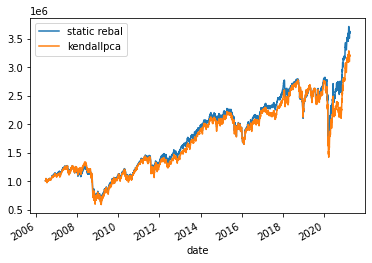

In [320]:
rets = pd.DataFrame(ret, columns = ['static rebal', 'kendallpca'], index = data.index)
rets.plot()

In [280]:
tickers = list(set(list(asset_hist['ticker'])))
v = 1/len(tickers)
portfolio_weights = {k:v for k in tickers}

x,y,z = ret_rebalance(data,portfolio_weights, initial_money = 1000000, rebalance_days = 20, threshold = 10)

In [92]:
test = data_select.pivot(index='date', columns='ticker', values = 'ret')
pca_mat = np.zeros([2,3])
for x in range(len(test)-200):
    
    kendcorr = test.iloc[x:200+x].corr('kendall')
    pca = PCA(n_components=17)
    pcafit = pca.fit(kendcorr)
    pca_mat = np.append(pca_mat, np.array([pcafit.explained_variance_ratio_]), axis=0)
    


ValueError: n_components=17 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [247]:
data

ticker,XBI,XES,XHB,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XOP,XPH,XRT,XSD
date,,,,,,,,,,,,,,,,,
2006-06-23,1.0178,1.0304,1.0056,1.0085,1.0222,0.9934,1.0027,0.9970,0.9966,1.0016,1.0010,0.9991,1.0204,1.0554,1.0090,1.0046,1.0016
2006-06-26,1.0030,0.9897,1.0139,1.0029,1.0111,1.0089,1.0027,1.0025,1.0034,1.0041,0.9963,1.0052,1.0070,1.0085,1.0049,0.9985,1.0044
2006-06-27,0.9880,1.0055,0.9770,0.9874,1.0019,0.9903,0.9907,0.9861,0.9975,0.9962,0.9896,0.9873,0.9927,1.0074,0.9881,0.9827,0.9751
2006-06-28,0.9942,1.0103,0.9931,1.0026,1.0172,1.0054,1.0030,1.0066,1.0046,1.0028,1.0000,1.0009,1.0080,1.0133,1.0011,0.9997,0.9930
2006-06-29,1.0255,1.0334,1.0282,1.0400,1.0284,1.0211,1.0211,1.0256,1.0159,1.0129,1.0173,1.0217,1.0637,1.0275,1.0088,1.0254,1.0277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,1.0288,1.0184,1.0294,1.0145,1.0037,1.0168,1.0160,0.9994,1.0097,1.0107,1.0042,1.0088,1.0218,1.0170,1.0117,1.0306,1.0034
2021-03-26,0.9841,1.0284,1.0364,1.0248,1.0248,1.0157,1.0173,1.0254,1.0177,1.0033,1.0189,1.0083,1.0635,1.0311,0.9988,1.0228,1.0413
2021-03-29,0.9722,0.9618,0.9818,0.9966,0.9881,0.9913,1.0002,0.9948,1.0101,1.0107,1.0047,0.9945,0.9759,0.9707,0.9866,0.9807,0.9701


In [259]:
kendcorr = data.iloc[:125].corr('kendall')
pca = PCA(n_components=17)
pcafit = pca.fit(kendcorr)
kendcorr

ticker,XBI,XES,XHB,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XME,XOP,XPH,XRT,XSD
ticker,,,,,,,,,,,,,,,,,
XBI,1.0000,0.1687,0.3255,0.3647,0.1262,0.3144,0.4366,0.3817,0.2628,0.0779,0.3690,0.3803,0.2915,0.1474,0.5231,0.3704,0.3643
XES,0.1687,1.0000,0.1263,0.3644,0.7509,0.0232,0.1563,0.1034,-0.0009,0.1301,0.0524,0.0933,0.5707,0.7179,0.1643,0.0705,0.1395
XHB,0.3255,0.1263,1.0000,0.2812,0.1061,0.3966,0.4348,0.3813,0.2694,0.1307,0.2772,0.5396,0.2289,0.1066,0.2981,0.4513,0.3546
XLB,0.3647,0.3644,0.2812,1.0000,0.3245,0.3049,0.4520,0.3618,0.1741,0.0496,0.1606,0.3617,0.6187,0.3261,0.3630,0.3428,0.3072
XLE,0.1262,0.7509,0.1061,0.3245,1.0000,0.0221,0.1381,0.0971,0.0026,0.1478,0.0228,0.0503,0.5205,0.7848,0.1492,0.0166,0.0852
XLF,0.3144,0.0232,0.3966,0.3049,0.0221,1.0000,0.5138,0.5292,0.4588,0.1557,0.3370,0.5651,0.1498,-0.0079,0.3512,0.5295,0.3811
XLI,0.4366,0.1563,0.4348,0.4520,0.1381,0.5138,1.0000,0.5050,0.3489,0.1098,0.3133,0.5938,0.3182,0.1308,0.4310,0.5347,0.4005
XLK,0.3817,0.1034,0.3813,0.3618,0.0971,0.5292,0.5050,1.0000,0.4082,0.1419,0.3816,0.5460,0.2383,0.0692,0.4932,0.5145,0.5628
XLP,0.2628,-0.0009,0.2694,0.1741,0.0026,0.4588,0.3489,0.4082,1.0000,0.2459,0.3957,0.3990,0.1001,0.0129,0.3151,0.3852,0.2717


In [252]:
comps = pcafit.components_
scree_threshold = .7
min_pp = 3
cum_exp_var = pcafit.explained_variance_ratio_.cumsum()
scree_comps = np.searchsorted(cum_exp_var, scree_threshold, side="left")

if scree_comps >= min_pp:
    n_comps = scree_comps
else:
        n_comps = min_pp
        
n_asset = comps.shape[1]



rebalance_threshold = .4

tot_pp_weights = np.zeros(n_comps)
tot_pp_weights[0] = rebalance_threshold*2 - cum_exp_var[0]
tot_pp_weights[1:] = (1-tot_pp_weights[0])/(n_comps-1)

long = np.zeros([n_comps, n_asset])
short = np.zeros([n_comps, n_asset])

for i in range(n_comps):
    l = np.zeros(n_asset)
    s = np.zeros(n_asset)
    pp = comps[i]
    
    if pp.sum() < 0:
        pp = -pp
    pos = pp.sum(where = pp>0)
    neg = abs(pp.sum(where = pp<0))
    w = tot_pp_weights[i]
    
    
    for t in range(n_asset):
        c = pp[t]
        
        if c > 0:
            l[t] = c/pos
            
        
        if c < 0:
            s[t] = c/neg
            
    long[i] = pos/(pos+neg)*l
    short[i] = neg/(pos+neg)*s
    
total = long+short
portfolio = np.matmul(tot_pp_weights, long+short)
norm_portfolio = portfolio/sum(abs(portfolio))

        

    
        
        
        
        
    
        

In [253]:
norm_portfolio

array([ 0.15560755, -0.0032564 , -0.01490171,  0.08550329, -0.02015445,
       -0.00850674,  0.05415336,  0.0721033 , -0.0292999 , -0.13889544,
        0.08846706,  0.00356246,  0.04805179, -0.02118479,  0.15893659,
        0.00690954,  0.09050563])

In [261]:
pca_port_weights(data[:125], scree_threshold = .7, min_pp = 3, rebalance_threshold = .4)

ticker    XBI     XES    XHB    XLB    XLE     XLF    XLI    XLK     XLP  \
ticker                                                                     
XBI    1.0000  0.1687 0.3255 0.3647 0.1262  0.3144 0.4366 0.3817  0.2628   
XES    0.1687  1.0000 0.1263 0.3644 0.7509  0.0232 0.1563 0.1034 -0.0009   
XHB    0.3255  0.1263 1.0000 0.2812 0.1061  0.3966 0.4348 0.3813  0.2694   
XLB    0.3647  0.3644 0.2812 1.0000 0.3245  0.3049 0.4520 0.3618  0.1741   
XLE    0.1262  0.7509 0.1061 0.3245 1.0000  0.0221 0.1381 0.0971  0.0026   
XLF    0.3144  0.0232 0.3966 0.3049 0.0221  1.0000 0.5138 0.5292  0.4588   
XLI    0.4366  0.1563 0.4348 0.4520 0.1381  0.5138 1.0000 0.5050  0.3489   
XLK    0.3817  0.1034 0.3813 0.3618 0.0971  0.5292 0.5050 1.0000  0.4082   
XLP    0.2628 -0.0009 0.2694 0.1741 0.0026  0.4588 0.3489 0.4082  1.0000   
XLU    0.0779  0.1301 0.1307 0.0496 0.1478  0.1557 0.1098 0.1419  0.2459   
XLV    0.3690  0.0524 0.2772 0.1606 0.0228  0.3370 0.3133 0.3816  0.3957   
XLY    0.380

array([ 0.15560755, -0.0032564 , -0.01490171,  0.08550329, -0.02015445,
       -0.00850674,  0.05415336,  0.0721033 , -0.0292999 , -0.13889544,
        0.08846706,  0.00356246,  0.04805179, -0.02118479,  0.15893659,
        0.00690954,  0.09050563])

In [178]:
np.matmul(tot_pp_weights,l)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 17 is different from 3)

In [155]:
.3528*-.06579148+.3235*.1197+-.053039*.3235

-0.0016464006440000019

In [71]:

pca = PCA(n_components=17)
principalComponents = pca.fit_transform(kendcorr)

In [54]:
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]
find_nearest(i, .61)

0.608589496647166

In [64]:
idx = np.searchsorted(i, .61, side="left")
idx

2

In [82]:
comps = pcafit.components_
comps.sum(where = comps < 0)

-8.280443815782439

In [46]:
plot = pca_mat[2:]

array([[0.57118803, 0.11133641, 0.0705372 ],
       [0.56738678, 0.11421216, 0.07104106],
       [0.56714055, 0.11373969, 0.0724495 ],
       ...,
       [0.45281618, 0.15253308, 0.11010998],
       [0.44838591, 0.16021563, 0.10931572],
       [0.44717444, 0.16141506, 0.10827442]])

In [47]:
pca_mat[2:].shape

(3518, 3)

In [32]:
df_plot_ret = pd.DataFrame(plot, index = data.index[200:])

In [35]:


with open('low_var_port.pkl', 'rb') as f: data_pca = pickle.load(f)
data_pca = data_pca.iloc[:,[1,5,9]]
data_pca.iloc[0] = [1,1,1]



In [41]:
df_dd_xy = df_dd

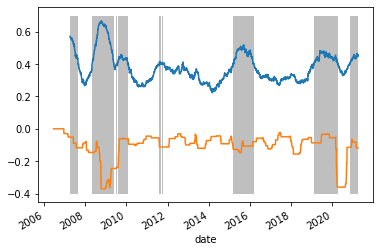

In [91]:
fig, ax = plt.subplots()
df_plot_ret[0].plot(ax=ax)
ax.plot(df_dd_xy.iloc[:])
ax.fill_between(df_plot_ret.index, -.4 , .7, where= df_plot_ret[0]> .4,
                 facecolor='gray', alpha=0.5)

plt.show()

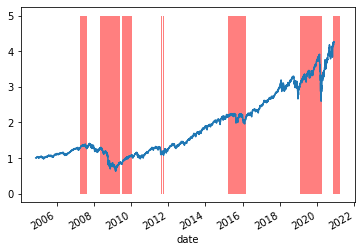

In [227]:
fig, ax = plt.subplots()
data_pca['SPY']['ret'].cumprod().plot(ax=ax)

ax.fill_between(df_plot_ret.index, 0 , 5, where= df_plot_ret[0]> .4,
                 facecolor='red', alpha=0.5)

plt.show()

In [223]:
df_plot_ret = pd.concat([df_plot_ret, data_pca['SPY']['ret']], axis=1)

In [226]:
df_plot_ret.dropna()

,0,1,2,ret
date,,,,
2007-04-12,0.5712,0.1113,0.0705,1.0044
2007-04-13,0.5674,0.1142,0.0710,1.0046
2007-04-16,0.5671,0.1137,0.0724,1.0095
2007-04-17,0.5619,0.1145,0.0734,1.0027
2007-04-18,0.5638,0.1157,0.0725,1.0012
...,...,...,...,...
2020-11-23,0.4142,0.1812,0.1259,1.0060
2020-11-24,0.4180,0.1793,0.1266,1.0161
2020-11-25,0.4193,0.1784,0.1264,0.9985


In [169]:
import pickle

with open('low_var_port.pkl', 'rb') as f: data_pca = pickle.load(f)
data_pca = data_pca.iloc[:,[1,5,9]]
data_pca.iloc[0] = [1,1,1]

In [138]:
test.explained_variance_ratio_[0:3]

array([0.57118803, 0.11133641, 0.0705372 ])

In [139]:
test.explained_variance_ratio_[0:3].append([0,0,3])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [136]:
test.explained_variance_ratio_

array([5.71188030e-01, 1.11336414e-01, 7.05371981e-02, 4.40134311e-02,
       3.92431601e-02, 3.42055276e-02, 2.45010968e-02, 2.09149321e-02,
       1.78857403e-02, 1.50468015e-02, 1.43305262e-02, 1.34683037e-02,
       7.62281206e-03, 6.79563142e-03, 5.61458081e-03, 3.29581455e-03,
       3.01061562e-33])

In [129]:
principalComponents

array([[-2.35250337e-01, -1.25402812e-01,  4.55386391e-01,
        -1.11245762e-01,  7.80332798e-02,  3.18478312e-01,
        -2.25928540e-01,  2.05141943e-01,  8.42839309e-02,
        -1.14928679e-01,  5.82696705e-02,  9.31696982e-02,
        -2.55848032e-04,  3.02942341e-02,  1.40335569e-02,
         1.04398783e-02,  4.95244916e-17],
       [ 1.23336706e+00, -4.19393292e-02, -4.67023071e-03,
         6.41505162e-02, -1.24870590e-01, -3.87825525e-02,
        -5.54074736e-02, -3.48511375e-02, -3.51615969e-02,
        -2.58983119e-02, -1.29193898e-02, -3.00714907e-02,
         3.43583824e-02,  1.32187648e-02,  2.23562937e-01,
        -3.45579346e-02,  4.95244916e-17],
       [-2.70174003e-01, -1.76426056e-02, -2.94278688e-01,
         1.11095643e-01, -2.76440698e-01,  3.77565765e-01,
         2.95796790e-01,  8.97733174e-02,  6.04021457e-02,
         5.68112613e-02,  1.74213855e-02,  6.37888375e-02,
        -3.94869967e-03, -6.15480109e-02,  1.14604176e-02,
        -3.31730871e-04,  4.9

## Industrials

### 1999-01-01 to 2012-01-01

In [236]:
start_date = pd.to_datetime('2006-06-23')
end_date = pd.to_datetime('2021-03-31')

tickers = list(set(list(asset_hist['ticker'])))
v = 1/len(tickers)
portfolio_weights = {k:v for k in tickers}

data_select = asset_hist[asset_hist['ticker'].isin(tickers)]
mask = (data_select['date'] >= start_date) & (data_select['date'] <= end_date)
data_select = data_select[mask]
data = data_select.pivot(index='date', columns='ticker', values = 'ret')+1

arr_port_sum, arr_port_det,arr_port_ret  = ret_rebalance(data,portfolio_weights, initial_money = 1, rebalance_days = 10000000000, threshold = 10000000)
df_port_ret = pd.DataFrame(arr_port_ret, index = data.index, columns = ['baseline'])
df_port_ret = df_port_ret+1
d_a_r = df_port_ret.groupby(df_port_ret.index.year).cumprod().groupby(df_port_ret.index.year).last()
d_a_r.loc['total_ret'] = df_port_ret.cumprod().iloc[-1]
base_ret = d_a_r


df_std_ann = df_port_ret.groupby(df_port_ret.index.year).std()*(252**.5)
df_std_ann.loc['total_std']=df_port_ret.std()*(252**.5)

df_var_ann = df_std_ann**2

n=125
arr_mdd = np.zeros(len(arr_port_sum))
for x in range(len(arr_port_sum)-n):
    end_index = n+x
    window = arr_port_sum[x:end_index]
    

    min_loc = np.argmax(np.maximum.accumulate(window) - window) # end of the period
    max_loc = np.argmax(window[:min_loc]) # start of period
    
    arr_mdd[end_index] = (window[min_loc]-window[max_loc])/window[max_loc] 
    x=+1

df_dd = pd.DataFrame(arr_mdd, index = data.index, columns = ['baseline'])
df_ann_mdd = df_dd.groupby(df_dd.index.year).min()
df_ann_mdd.loc['MDD'] = df_ann_mdd.min()


In [245]:
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau

C:\Users\justi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [111]:

tickers

['XLU',
 'XES',
 'XHB',
 'XLP',
 'XLF',
 'XRT',
 'XLB',
 'XBI',
 'XOP',
 'XPH',
 'XLV',
 'XLY',
 'XLE',
 'XLK',
 'XSD',
 'XLI',
 'XME']

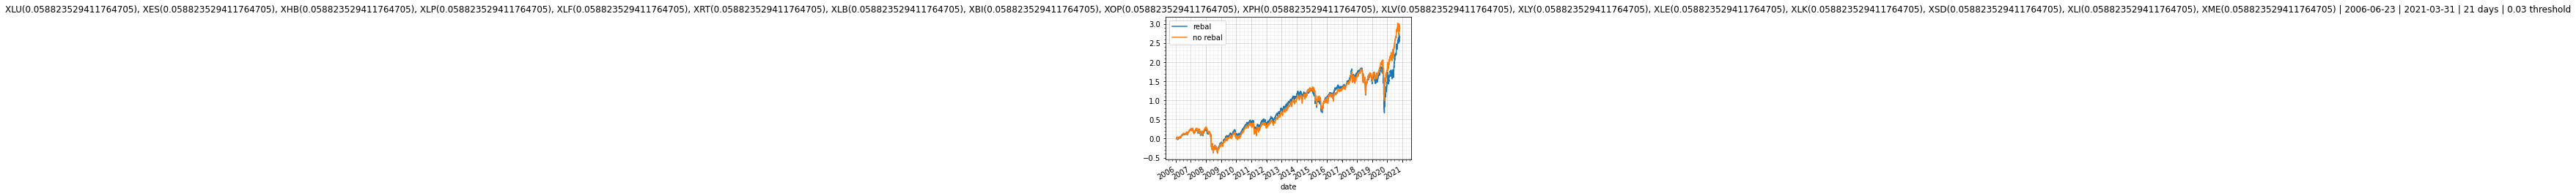

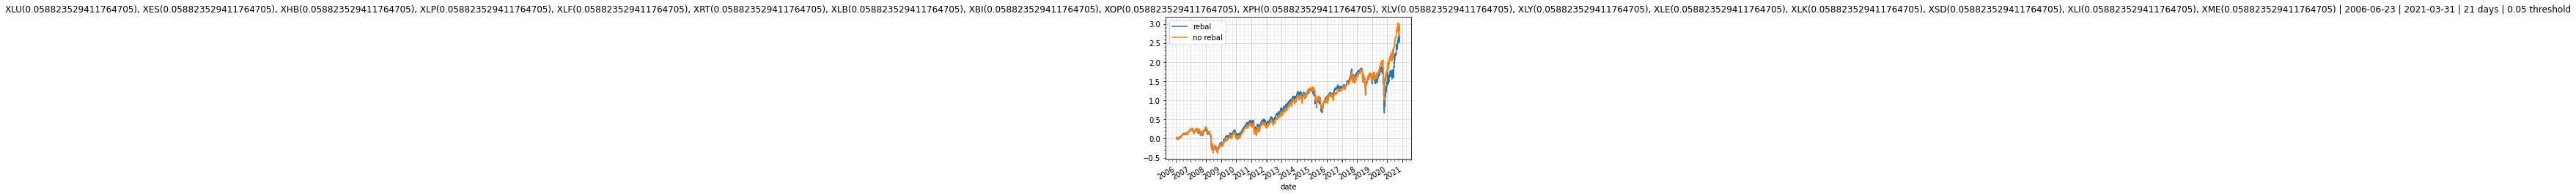

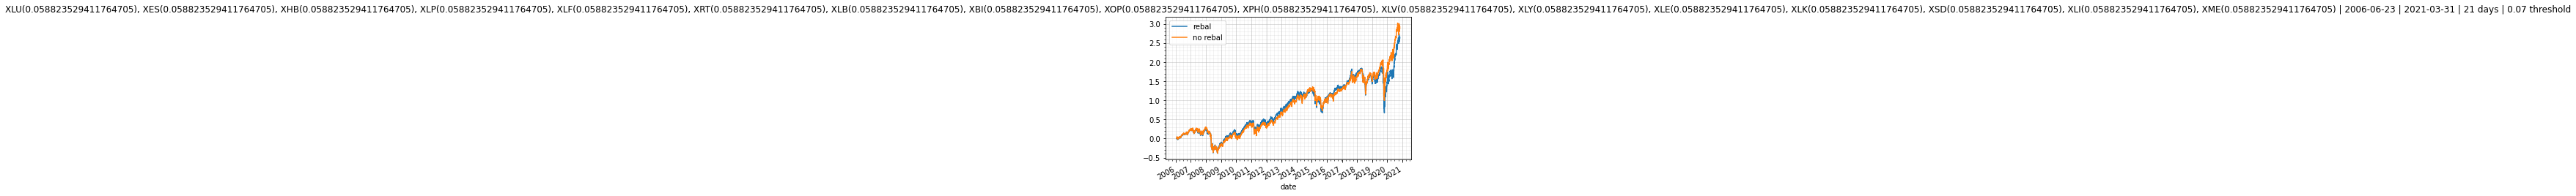

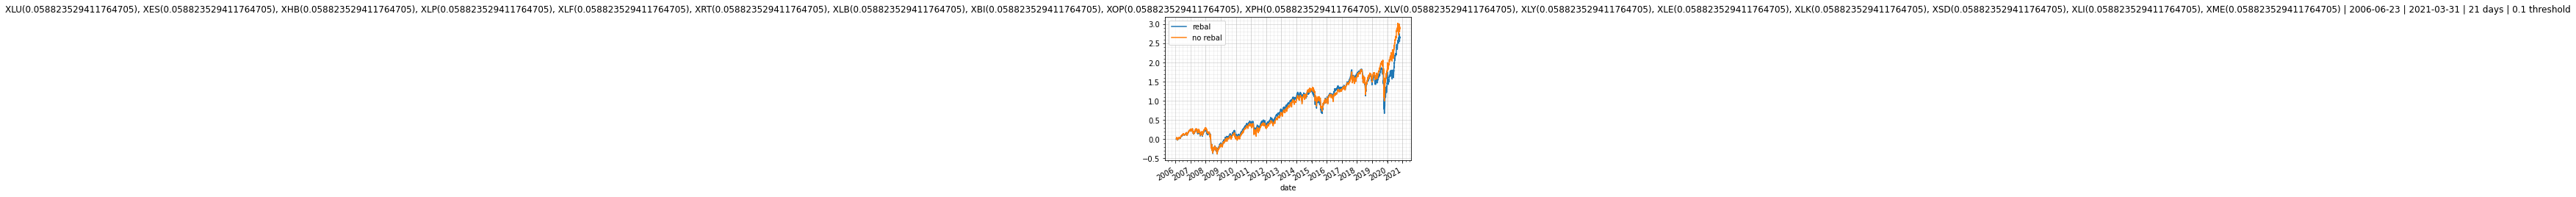

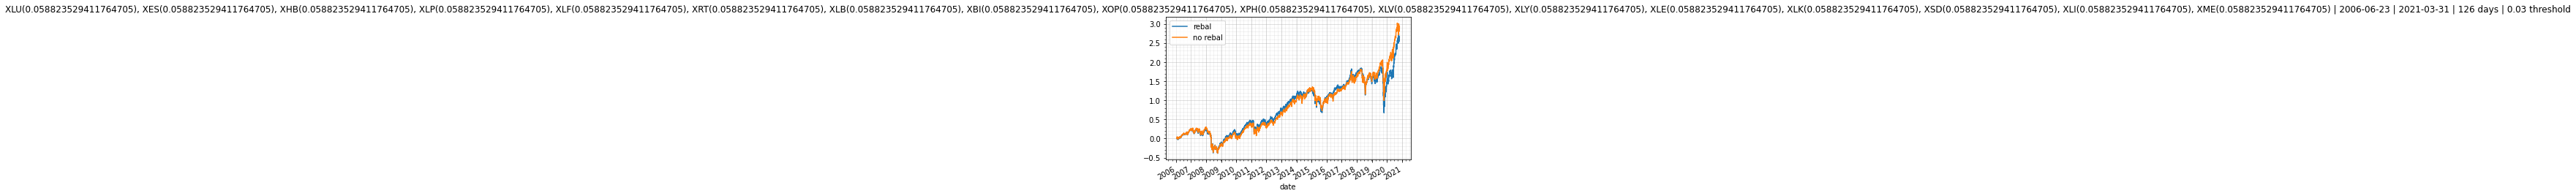

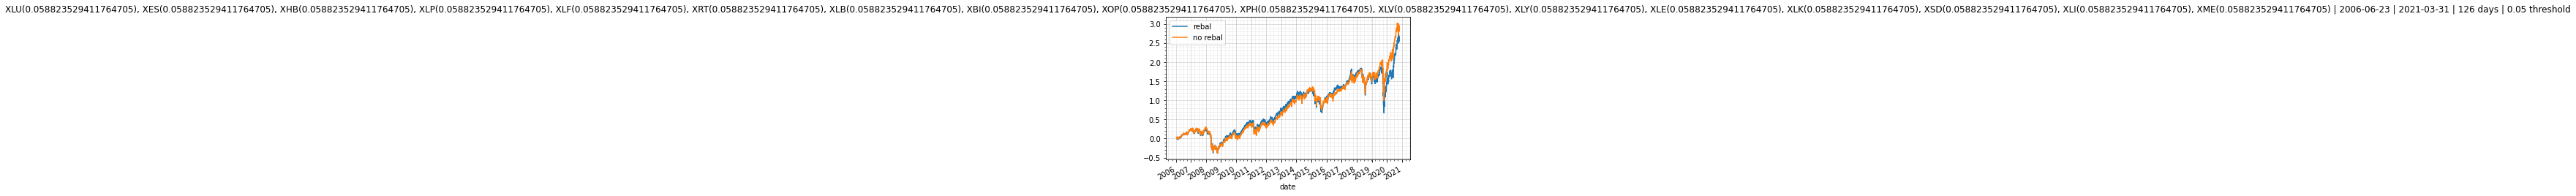

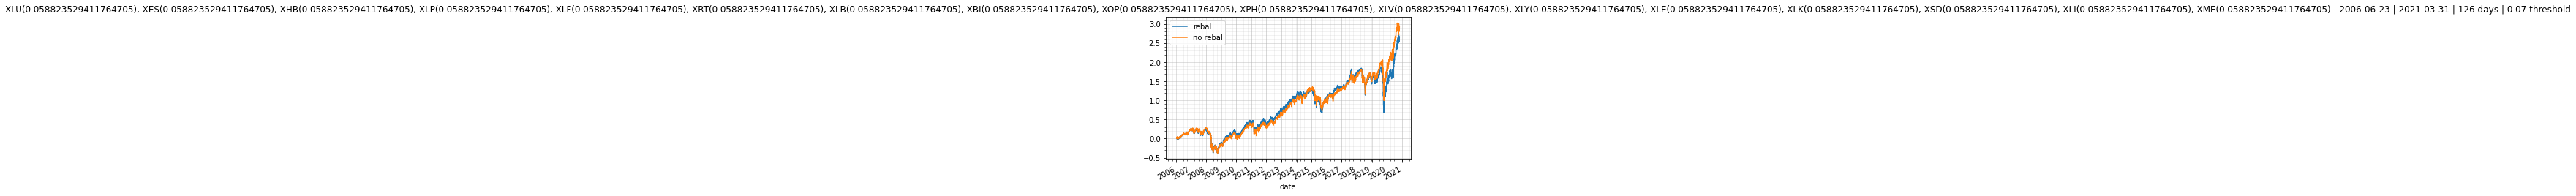

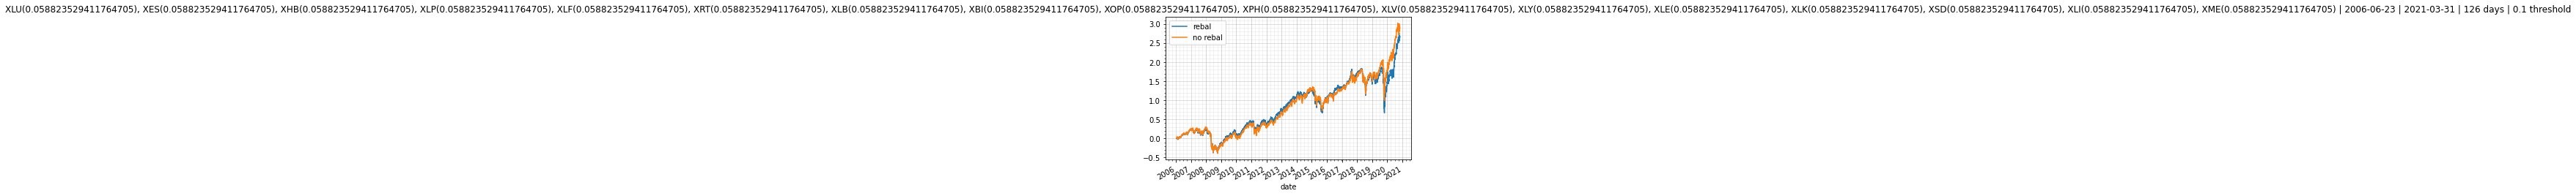

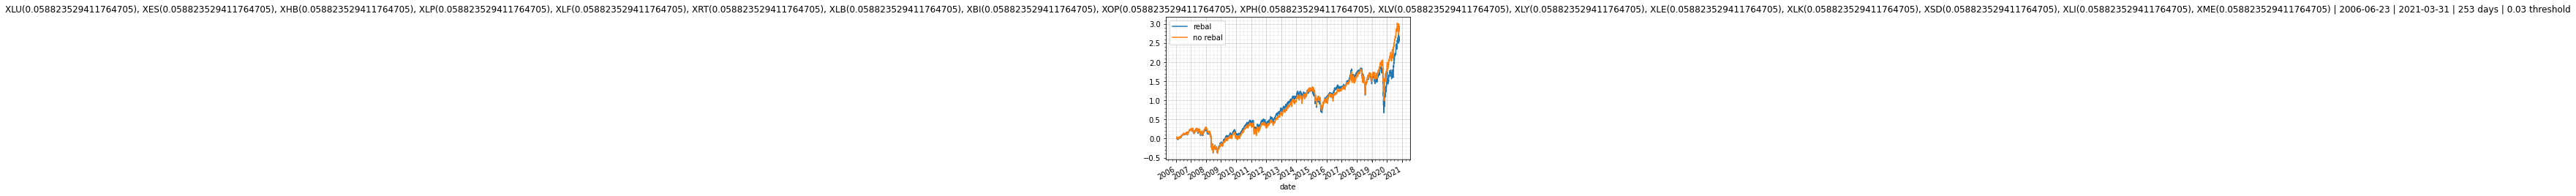

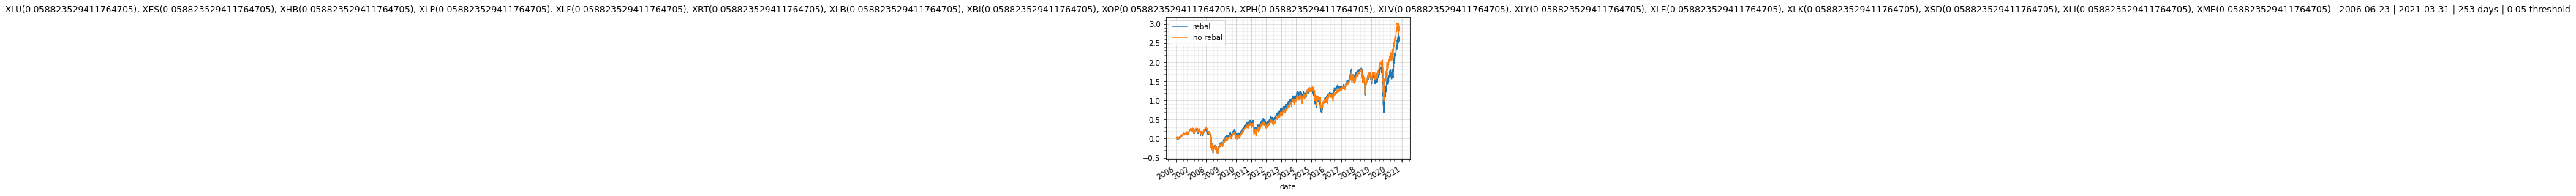

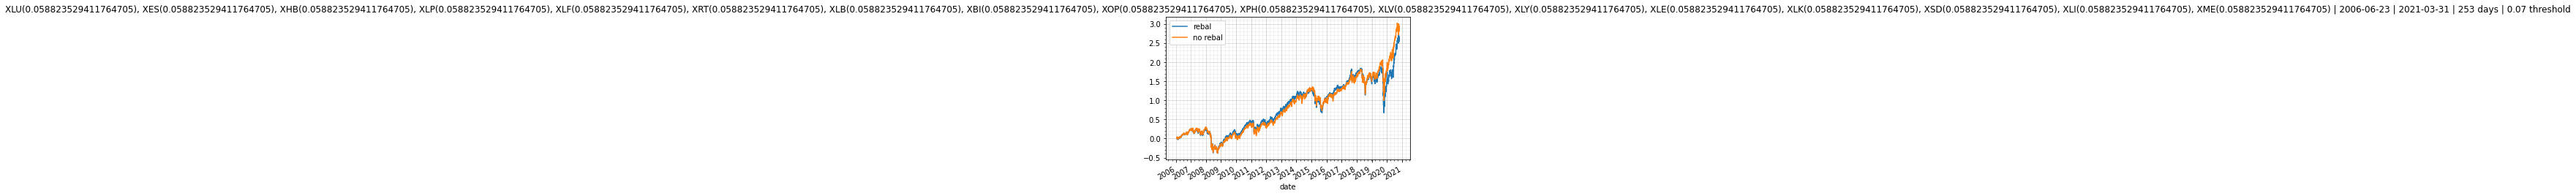

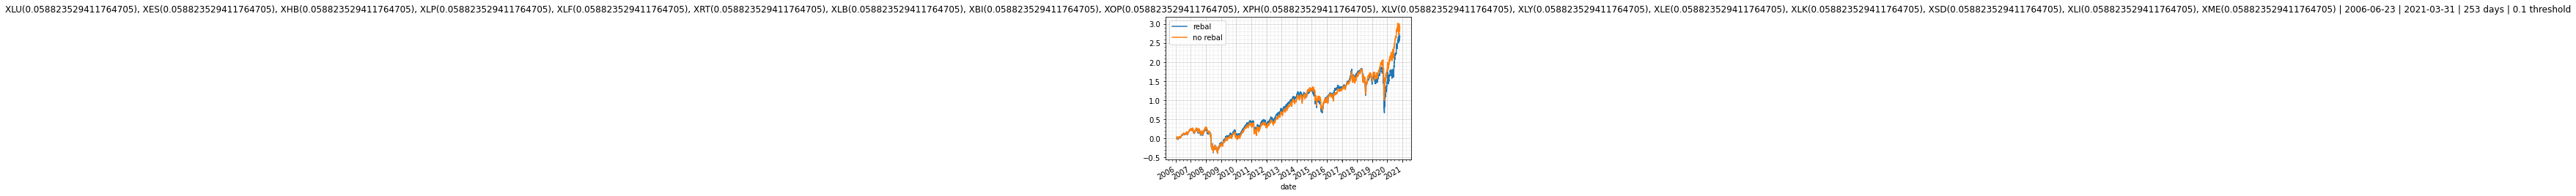

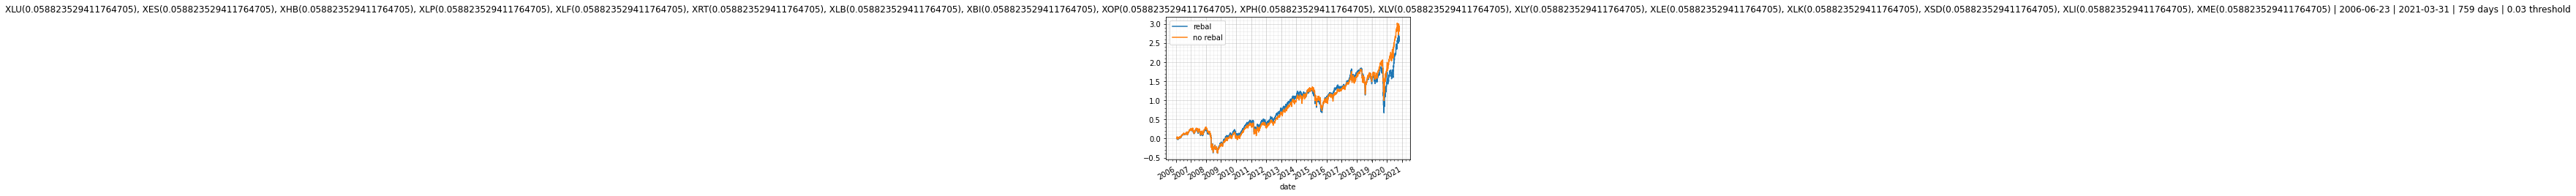

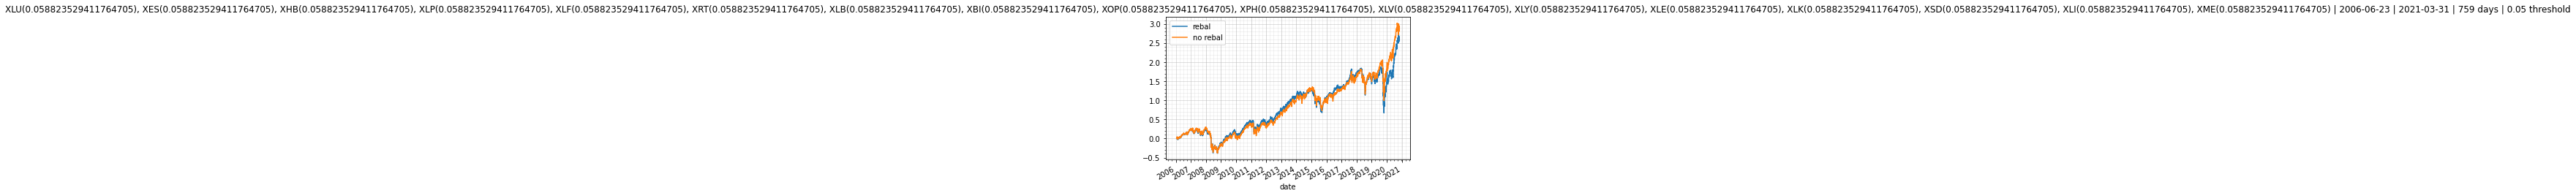

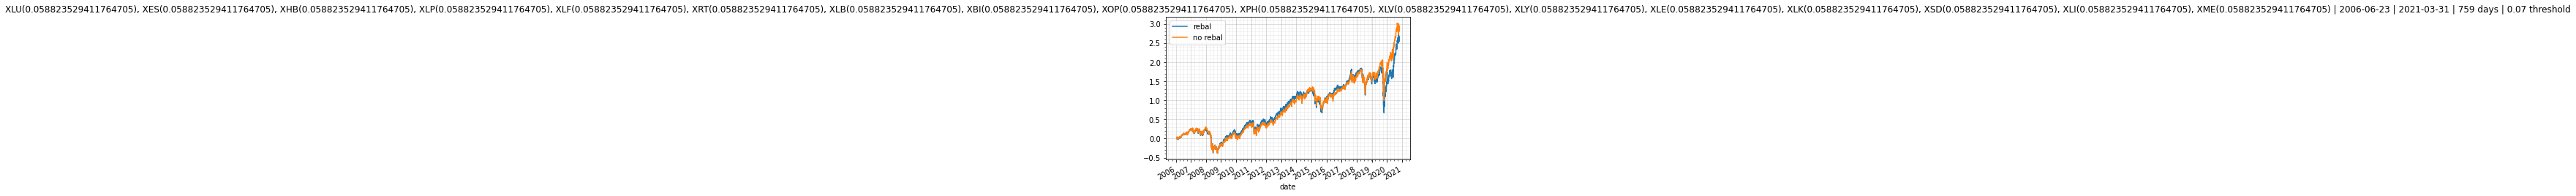

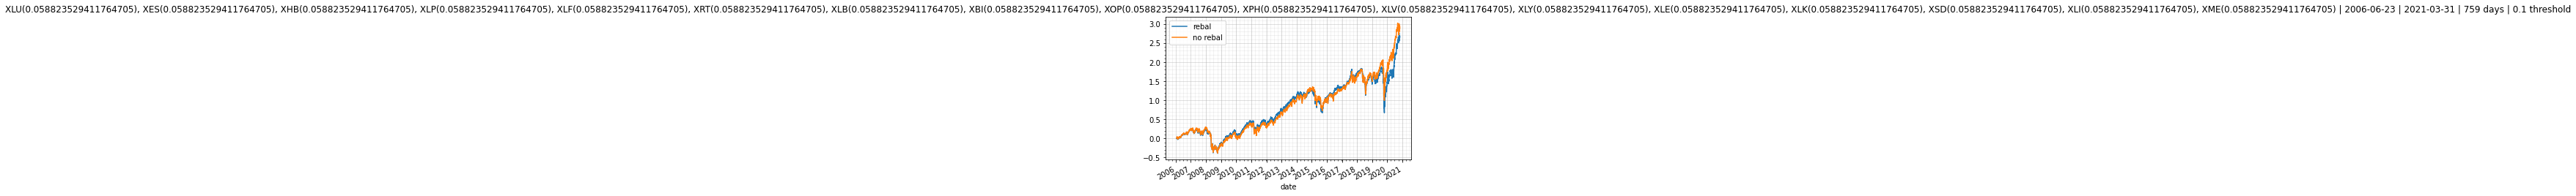

In [100]:
base_arr_port_sum = arr_port_sum
portfolio = [str(k)+'('+str(portfolio_weights[k])+')'for k in portfolio_weights]
port_name = str()
for x in portfolio:
    if port_name == str():
        port_name = port_name + x
    else:
        port_name = port_name + ", " + x 
port_name = port_name + " | "
sum_col = 1
det_col = 51
counter = 0
ls_rebal_day = [21,126,253,759]
ls_threshold = [.03,.05,.07,.1]
arr_sum_value = np.zeros((len(ls_rebal_day)*len(ls_threshold),len(data), sum_col))
arr_ret_value = np.zeros((len(ls_rebal_day)*len(ls_threshold),len(data), sum_col))
arr_det_value = np.zeros((len(ls_rebal_day)*len(ls_threshold),len(data), det_col))
avg_return=np.zeros((len(ls_rebal_day)*len(ls_threshold)))
std_return=np.zeros((len(ls_rebal_day)*len(ls_threshold)))
var_return=np.zeros((len(ls_rebal_day)*len(ls_threshold)))
max_dd=np.zeros((len(ls_rebal_day)*len(ls_threshold)))
test=np.zeros((len(ls_rebal_day)*len(ls_threshold),1))

df_ann_ret = pd.DataFrame(base_ret, columns = ['baseline'])
df_ann_std = df_std_ann
df_ann_var = df_var_ann


for d in ls_rebal_day:
    for t in ls_threshold:
        arr_port_sum, arr_port_det,arr_port_ret  = ret_rebalance(data,portfolio_weights, initial_money = 1, rebalance_days = d, threshold = t)

        title = str(d)+" days | " +str(t) + " threshold"
        
        #Annual Returns
        df_port_ret = pd.DataFrame(arr_port_ret, index = data.index)
        df_port_ret = df_port_ret+1
        d_a_r = df_port_ret.groupby(df_port_ret.index.year).cumprod().groupby(df_port_ret.index.year).last()
        d_a_r.loc['total_ret'] = df_port_ret.cumprod().iloc[-1]
        df_ann_ret[title] = d_a_r
        
        #Annual STD
        d_a_s = df_port_ret.groupby(df_port_ret.index.year).std()*(252**.5)
        d_a_s.loc['total_std'] = df_port_ret.std()*(252**.5)
        df_ann_std[title] = d_a_s
        
        
        #Annual VAR
        d_a_v = d_a_s**2
        df_ann_var[title] = d_a_v
        
        #Annual MDD
        n=125
        arr_mdd = np.zeros(len(arr_port_sum))
        for x in range(len(arr_port_sum)-n):
            end_index = n+x
            window = arr_port_sum[x:end_index]


            min_loc = np.argmax(np.maximum.accumulate(window) - window) # end of the period
            max_loc = np.argmax(window[:min_loc]) # start of period

            arr_mdd[end_index] = (window[min_loc]-window[max_loc])/window[max_loc] 
            x=+1
        df_dd = pd.DataFrame(arr_mdd, index = data.index)
        df_m = df_dd.groupby(df_dd.index.year).min()
        df_m.loc['MDD'] = df_m.min()
        df_ann_mdd[title] = df_m
        i = np.argmax(np.maximum.accumulate(arr_port_sum) - arr_port_sum) # end of the period
        j = np.argmax(arr_port_sum[:i])
        
        arr_sum_value[counter] = arr_port_sum
        arr_det_value[counter] = arr_port_det
        arr_ret_value[counter] = arr_port_ret
        avg_return[counter]=(np.cumprod(arr_port_ret+1, axis=0)[-1]**(1/(len(arr_port_ret)/253))-1).item()
        std_return[counter]=(np.std(arr_port_ret))
        var_return[counter]=(np.var(arr_port_ret))
        s=(arr_port_ret+1).cumprod()
        max_dd[counter]=np.ptp(s)/s.max()
        fig, ax = plt.subplots()
        plt.minorticks_on()

        fmt_half_year = mdates.MonthLocator(interval=12)
        ax.xaxis.set_major_locator(fmt_half_year)
        graph = pd.DataFrame(s-1).set_index(data.index)
        graph.plot(ax=ax)
        #plt.plot(df_dd)
        test = pd.DataFrame(base_arr_port_sum-1, index = data.index)
        ax.plot(test)
        #plt.plot([data.index[i], data.index[j]], [plot_port[i], plot_port[j]], 'o', color='Red', markersize=10)
        ax.legend(['rebal', 'no rebal'])
        ax.set_title(port_name+str(start_date)[:10]+" | "+str(end_date)[:10]+" | "+title)
                      
        ax.grid(which='minor', alpha=0.2)
        ax.grid(which='major', alpha=0.5)

        plt.show()
        counter +=1

df_ann_ret = df_ann_ret-1

df_ann_ret = df_ann_ret.style.set_table_attributes("style='display:inline'").set_caption('Annual Returns ' + port_name+str(start_date)[:10]+" | "+str(end_date)[:10]).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '16px'),
        ('font-weight', 'bold')
    ]
}]).format("{:.2%}")

df_ann_std = df_ann_std.style.set_table_attributes("style='display:inline'").set_caption('Annual StDev ' + port_name+str(start_date)[:10]+" | "+str(end_date)[:10]).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '16px'),
        ('font-weight', 'bold')
    ]
}]).format("{:.2%}")

df_ann_var = df_ann_var.style.set_table_attributes("style='display:inline'").set_caption('Annual VAR ' + port_name+str(start_date)[:10]+" | "+str(end_date)[:10]).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '16px'),
        ('font-weight', 'bold')
    ]
}]).format("{:.2%}")

df_ann_mdd = df_ann_mdd.style.set_table_attributes("style='display:inline'").set_caption('Annual MDD ' + port_name+str(start_date)[:10]+" | "+str(end_date)[:10]).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '16px'),
        ('font-weight', 'bold')
    ]
}]).format("{:.2%}")

### Returns

In [101]:
df_ann_ret


,baseline,21 days | 0.03 threshold,21 days | 0.05 threshold,21 days | 0.07 threshold,21 days | 0.1 threshold,126 days | 0.03 threshold,126 days | 0.05 threshold,126 days | 0.07 threshold,126 days | 0.1 threshold,253 days | 0.03 threshold,253 days | 0.05 threshold,253 days | 0.07 threshold,253 days | 0.1 threshold,759 days | 0.03 threshold,759 days | 0.05 threshold,759 days | 0.07 threshold,759 days | 0.1 threshold
date,,,,,,,,,,,,,,,,,
2006,10.50%,11.04%,11.11%,11.15%,11.20%,11.04%,11.11%,11.14%,11.04%,11.04%,11.11%,11.14%,11.04%,11.04%,11.11%,11.14%,11.04%
2007,9.72%,7.87%,7.83%,7.93%,7.79%,7.87%,7.83%,8.01%,7.91%,7.87%,7.83%,8.01%,7.91%,7.87%,7.83%,8.01%,7.91%
2008,-36.68%,-34.80%,-34.86%,-34.86%,-35.03%,-34.80%,-34.86%,-34.86%,-35.02%,-34.80%,-34.86%,-34.86%,-35.02%,-34.80%,-34.86%,-34.86%,-35.02%
2009,35.01%,40.62%,40.42%,40.13%,40.23%,40.62%,40.42%,40.13%,40.17%,40.62%,40.42%,40.13%,40.17%,40.62%,40.42%,40.13%,40.17%
2010,20.54%,21.02%,21.06%,20.93%,20.82%,21.02%,21.06%,20.95%,20.90%,21.02%,21.06%,20.95%,20.90%,21.02%,21.06%,20.95%,20.90%
2011,0.61%,0.47%,0.39%,0.50%,0.43%,0.47%,0.39%,0.40%,0.26%,0.47%,0.39%,0.40%,0.26%,0.47%,0.39%,0.40%,0.26%
2012,13.12%,14.83%,14.94%,14.94%,14.91%,14.83%,14.94%,14.99%,15.09%,14.83%,14.94%,14.99%,15.09%,14.83%,14.94%,14.99%,15.09%
2013,33.50%,31.78%,31.76%,31.69%,31.62%,31.78%,31.76%,31.67%,31.76%,31.78%,31.76%,31.67%,31.76%,31.78%,31.76%,31.67%,31.76%
2014,11.62%,7.48%,7.46%,7.50%,7.55%,7.48%,7.47%,7.53%,7.59%,7.48%,7.47%,7.53%,7.59%,7.48%,7.47%,7.53%,7.59%


### STD

In [102]:
df_ann_std

,baseline,21 days | 0.03 threshold,21 days | 0.05 threshold,21 days | 0.07 threshold,21 days | 0.1 threshold,126 days | 0.03 threshold,126 days | 0.05 threshold,126 days | 0.07 threshold,126 days | 0.1 threshold,253 days | 0.03 threshold,253 days | 0.05 threshold,253 days | 0.07 threshold,253 days | 0.1 threshold,759 days | 0.03 threshold,759 days | 0.05 threshold,759 days | 0.07 threshold,759 days | 0.1 threshold
date,,,,,,,,,,,,,,,,,
2006,12.20%,12.34%,12.33%,12.35%,12.34%,12.34%,12.33%,12.35%,12.31%,12.34%,12.33%,12.35%,12.31%,12.34%,12.33%,12.35%,12.31%
2007,16.67%,16.76%,16.75%,16.76%,16.74%,16.76%,16.75%,16.76%,16.75%,16.76%,16.75%,16.76%,16.75%,16.76%,16.75%,16.76%,16.75%
2008,40.51%,41.76%,41.74%,41.74%,41.75%,41.76%,41.74%,41.74%,41.74%,41.76%,41.74%,41.74%,41.74%,41.76%,41.74%,41.74%,41.74%
2009,28.21%,30.44%,30.44%,30.46%,30.47%,30.44%,30.44%,30.46%,30.46%,30.44%,30.44%,30.46%,30.46%,30.44%,30.44%,30.46%,30.46%
2010,20.24%,20.58%,20.58%,20.58%,20.56%,20.58%,20.58%,20.59%,20.56%,20.58%,20.58%,20.59%,20.56%,20.58%,20.58%,20.59%,20.56%
2011,26.82%,27.11%,27.11%,27.10%,27.10%,27.11%,27.12%,27.09%,27.06%,27.11%,27.12%,27.09%,27.06%,27.11%,27.12%,27.09%,27.06%
2012,14.79%,15.36%,15.36%,15.34%,15.35%,15.36%,15.36%,15.33%,15.33%,15.36%,15.36%,15.33%,15.33%,15.36%,15.36%,15.33%,15.33%
2013,12.72%,12.85%,12.86%,12.85%,12.85%,12.85%,12.86%,12.85%,12.84%,12.85%,12.86%,12.85%,12.84%,12.85%,12.86%,12.85%,12.84%
2014,14.06%,13.74%,13.73%,13.71%,13.71%,13.74%,13.73%,13.71%,13.70%,13.74%,13.73%,13.71%,13.70%,13.74%,13.73%,13.71%,13.70%


### VAR

In [103]:
df_ann_var

,baseline,21 days | 0.03 threshold,21 days | 0.05 threshold,21 days | 0.07 threshold,21 days | 0.1 threshold,126 days | 0.03 threshold,126 days | 0.05 threshold,126 days | 0.07 threshold,126 days | 0.1 threshold,253 days | 0.03 threshold,253 days | 0.05 threshold,253 days | 0.07 threshold,253 days | 0.1 threshold,759 days | 0.03 threshold,759 days | 0.05 threshold,759 days | 0.07 threshold,759 days | 0.1 threshold
date,,,,,,,,,,,,,,,,,
2006,1.49%,1.52%,1.52%,1.52%,1.52%,1.52%,1.52%,1.52%,1.51%,1.52%,1.52%,1.52%,1.51%,1.52%,1.52%,1.52%,1.51%
2007,2.78%,2.81%,2.81%,2.81%,2.80%,2.81%,2.81%,2.81%,2.81%,2.81%,2.81%,2.81%,2.81%,2.81%,2.81%,2.81%,2.81%
2008,16.41%,17.44%,17.43%,17.42%,17.43%,17.44%,17.43%,17.42%,17.42%,17.44%,17.43%,17.42%,17.42%,17.44%,17.43%,17.42%,17.42%
2009,7.96%,9.27%,9.27%,9.28%,9.28%,9.27%,9.27%,9.28%,9.28%,9.27%,9.27%,9.28%,9.28%,9.27%,9.27%,9.28%,9.28%
2010,4.09%,4.24%,4.24%,4.24%,4.23%,4.24%,4.24%,4.24%,4.23%,4.24%,4.24%,4.24%,4.23%,4.24%,4.24%,4.24%,4.23%
2011,7.19%,7.35%,7.35%,7.34%,7.35%,7.35%,7.35%,7.34%,7.32%,7.35%,7.35%,7.34%,7.32%,7.35%,7.35%,7.34%,7.32%
2012,2.19%,2.36%,2.36%,2.35%,2.36%,2.36%,2.36%,2.35%,2.35%,2.36%,2.36%,2.35%,2.35%,2.36%,2.36%,2.35%,2.35%
2013,1.62%,1.65%,1.65%,1.65%,1.65%,1.65%,1.65%,1.65%,1.65%,1.65%,1.65%,1.65%,1.65%,1.65%,1.65%,1.65%,1.65%
2014,1.98%,1.89%,1.88%,1.88%,1.88%,1.89%,1.88%,1.88%,1.88%,1.89%,1.88%,1.88%,1.88%,1.89%,1.88%,1.88%,1.88%


### Covariance Matrix

In [104]:
cov_data = data

print('Covariance Matrix')
print(cov_data.cov(), '\n')

print('Correlation Matrix')
print(cov_data.corr())

Covariance Matrix
ticker    XBI    XES    XHB    XLB    XLE    XLF    XLI    XLK    XLP    XLU  \
ticker                                                                         
XBI    0.0004 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0001 0.0001   
XES    0.0002 0.0007 0.0003 0.0003 0.0005 0.0003 0.0003 0.0002 0.0001 0.0001   
XHB    0.0002 0.0003 0.0004 0.0002 0.0002 0.0003 0.0002 0.0002 0.0001 0.0001   
XLB    0.0002 0.0003 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0001 0.0001   
XLE    0.0002 0.0005 0.0002 0.0002 0.0004 0.0003 0.0002 0.0002 0.0001 0.0001   
XLF    0.0002 0.0003 0.0003 0.0002 0.0003 0.0004 0.0002 0.0002 0.0001 0.0001   
XLI    0.0002 0.0003 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0001 0.0001   
XLK    0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0001 0.0001   
XLP    0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001   
XLU    0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0002   
XLV    0.0002 0.0002 0

### MDD

In [105]:
df_ann_mdd

,baseline,21 days | 0.03 threshold,21 days | 0.05 threshold,21 days | 0.07 threshold,21 days | 0.1 threshold,126 days | 0.03 threshold,126 days | 0.05 threshold,126 days | 0.07 threshold,126 days | 0.1 threshold,253 days | 0.03 threshold,253 days | 0.05 threshold,253 days | 0.07 threshold,253 days | 0.1 threshold,759 days | 0.03 threshold,759 days | 0.05 threshold,759 days | 0.07 threshold,759 days | 0.1 threshold
date,,,,,,,,,,,,,,,,,
2006,-6.55%,-6.54%,-6.52%,-6.52%,-6.49%,-6.54%,-6.52%,-6.52%,-6.49%,-6.54%,-6.52%,-6.52%,-6.49%,-6.54%,-6.52%,-6.52%,-6.49%
2007,-10.93%,-10.91%,-10.91%,-10.94%,-10.91%,-10.91%,-10.91%,-10.86%,-10.89%,-10.91%,-10.91%,-10.86%,-10.89%,-10.91%,-10.91%,-10.86%,-10.89%
2008,-51.00%,-50.54%,-50.54%,-50.65%,-50.67%,-50.54%,-50.54%,-50.65%,-50.67%,-50.54%,-50.54%,-50.65%,-50.67%,-50.54%,-50.54%,-50.65%,-50.67%
2009,-46.65%,-47.26%,-47.19%,-47.26%,-47.38%,-47.26%,-47.19%,-47.26%,-47.38%,-47.26%,-47.19%,-47.26%,-47.38%,-47.26%,-47.19%,-47.26%,-47.38%
2010,-16.85%,-17.29%,-17.26%,-17.29%,-17.35%,-17.29%,-17.26%,-17.29%,-17.29%,-17.29%,-17.26%,-17.29%,-17.29%,-17.29%,-17.26%,-17.29%,-17.29%
2011,-23.88%,-24.29%,-24.31%,-24.28%,-24.18%,-24.29%,-24.31%,-24.30%,-24.33%,-24.29%,-24.31%,-24.30%,-24.33%,-24.29%,-24.31%,-24.30%,-24.33%
2012,-23.57%,-23.99%,-24.00%,-23.98%,-23.89%,-23.99%,-24.00%,-24.01%,-23.95%,-23.99%,-24.00%,-24.01%,-23.95%,-23.99%,-24.00%,-24.01%,-23.95%
2013,-9.50%,-9.41%,-9.37%,-9.36%,-9.43%,-9.41%,-9.37%,-9.36%,-9.42%,-9.41%,-9.37%,-9.36%,-9.42%,-9.41%,-9.37%,-9.36%,-9.42%
2014,-10.42%,-11.72%,-11.69%,-11.66%,-11.62%,-11.72%,-11.68%,-11.65%,-11.64%,-11.72%,-11.68%,-11.65%,-11.64%,-11.72%,-11.68%,-11.65%,-11.64%


In [39]:
start_date = pd.to_datetime('2006-06-23')
end_date = pd.to_datetime('2021-03-31')

tickers = ['SPY', 'XLU']
portfolio_weights = {'SPY': 1,'XLU': 0}

data_select = asset_hist[asset_hist['ticker'].isin(tickers)]
mask = (data_select['date'] >= start_date) & (data_select['date'] <= end_date)
data_select = data_select[mask]
data = data_select.pivot(index='date', columns='ticker', values = 'ret')+1

arr_port_sum, arr_port_det,arr_port_ret  = ret_rebalance(data,portfolio_weights, initial_money = 1, rebalance_days = 10000000000, threshold = 10000000)
df_port_ret = pd.DataFrame(arr_port_ret, index = data.index, columns = ['baseline'])
df_port_ret = df_port_ret+1
d_a_r = df_port_ret.groupby(df_port_ret.index.year).cumprod().groupby(df_port_ret.index.year).last()
d_a_r.loc['total_ret'] = df_port_ret.cumprod().iloc[-1]
base_ret = d_a_r


df_std_ann = df_port_ret.groupby(df_port_ret.index.year).std()*(252**.5)
df_std_ann.loc['total_std']=df_port_ret.std()*(252**.5)

df_var_ann = df_std_ann**2

n=125
arr_mdd = np.zeros(len(arr_port_sum))
for x in range(len(arr_port_sum)-n):
    end_index = n+x
    window = arr_port_sum[x:end_index]
    

    min_loc = np.argmax(np.maximum.accumulate(window) - window) # end of the period
    max_loc = np.argmax(window[:min_loc]) # start of period
    
    arr_mdd[end_index] = (window[min_loc]-window[max_loc])/window[max_loc] 
    x=+1

df_dd = pd.DataFrame(arr_mdd, index = data.index, columns = ['baseline'])
df_ann_mdd = df_dd.groupby(df_dd.index.year).min()
df_ann_mdd.loc['MDD'] = df_ann_mdd.min()

C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


In [40]:
df_dd

,baseline
date,
2006-06-23,0.0000
2006-06-26,0.0000
2006-06-27,0.0000
2006-06-28,0.0000
2006-06-29,0.0000
...,...
2021-03-25,-0.1183
2021-03-26,-0.1183
2021-03-29,-0.1183
